In [1]:
%run RD_HERS_HETDEX_base_functions.ipynb

In [2]:
deltal=100
width=0.5

In [3]:
path_sav = '/Users/mviero/data/Astronomy/data/combined_spectra_all_corrected_errors'
path_psf = os.path.join(os.environ['MAPSPATH'],'Herschel','psf')
file_sav = 'combined_spectra_extended_sources_only_dl_160_bin_width_25_percent_'
map_sav = {'PSW':'250','PMW':'350','PLW':'500'}
map_psf = {'PSW':17.6,'PMW':23.9,'PLW':35.2}

In [4]:
hers_maps = {'combined':
             {'PSW':'hers_itermap_12.0_arcsec_pixels_PSW',
              'PMW':'hers_itermap_12.0_arcsec_pixels_PMW',
              'PLW':'hers_itermap_12.0_arcsec_pixels_PLW'
             }, 
             'jk1':
             {'PSW':'hers_itermap_12.0_arcsec_pixels_jk_ang1_PSW',
              'PMW':'hers_itermap_12.0_arcsec_pixels_jk_ang1_PMW',
              'PLW':'hers_itermap_12.0_arcsec_pixels_jk_ang1_PLW'
             }, 
             'jk2':
             {'PSW':'hers_itermap_12.0_arcsec_pixels_jk_ang2_PSW',
              'PMW':'hers_itermap_12.0_arcsec_pixels_jk_ang2_PMW',
              'PLW':'hers_itermap_12.0_arcsec_pixels_jk_ang2_PLW'
             }, 
            }

In [5]:
hers_maps = {'combined':
             {'PSW':'hers-act_SANEPIC_PSW_20121012',
              'PMW':'hers-act_SANEPIC_PMW_20121012',
              'PLW':'hers-act_SANEPIC_PLW_20121012'
             }, 
             'jk1':
             {'PSW':'hers-act_SANEPIC_PSW_20121012',
              'PMW':'hers-act_SANEPIC_PMW_20121012',
              'PLW':'hers-act_SANEPIC_PLW_20121012'
             }, 
             'jk2':
             {'PSW':'hers-act_SANEPIC_PSW_20121012',
              'PMW':'hers-act_SANEPIC_PMW_20121012',
              'PLW':'hers-act_SANEPIC_PLW_20121012'
             }, 
            }

In [6]:
hers_maps = {'combined':
             {'PSW':'hers_PSW_tan_spirepix_sanePic_20130321',
              'PMW':'hers_PMW_tan_spirepix_sanePic_20130321',
              'PLW':'hers_PLW_tan_spirepix_sanePic_20130321'
             }, 
             'jk1':
             {'PSW':'hers_PSW_tan_spirepix_sanePic_20130321',
              'PMW':'hers_PMW_tan_spirepix_sanePic_20130321',
              'PLW':'hers_PLW_tan_spirepix_sanePic_20130321'
             }, 
             'jk2':
             {'PSW':'hers_PSW_tan_spirepix_sanePic_20130321',
              'PMW':'hers_PMW_tan_spirepix_sanePic_20130321',
              'PLW':'hers_PLW_tan_spirepix_sanePic_20130321'
             }, 
            }

In [4]:
path_hers_maps = os.path.join(os.environ['MAPSPATH'],'Herschel','SPT')

hers_maps = {'combined':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_PLW'
             }, 
             'jk1':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half1_PLW'
             }, 
             'jk2':
             {'PSW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PSW',
              'PMW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PMW',
              'PLW':'spt_zea_itermap_10_iterations_15_arcsec_pixels_jk_half2_PLW'
             }, 
            }

In [5]:
class MapObject():
    maps={}
    masks={}
    headers={}
    pix_sizes_arcsec={}
    def __init__(self, base_path, jack_dict):
        for jack, map_dict in jack_dict.items():
            self.maps[jack]={}
            self.masks[jack]={}
            self.headers[jack]={}
            self.pix_sizes_arcsec[jack]={}
            for key, map_name in map_dict.items():
                map_path = os.path.join(base_path, map_name+'.fits')
                try:
                    map_in, hd_in = fits.getdata(map_path, 0, header=True)
                except:
                    map_in, hd_in = fits.getdata(map_path, 1, header=True)
                try:
                    pix_arcsec = hd_in['CDELT2']*3600
                except:
                    pix_arcsec = hd_in['CD2_2']*3600  
                self.maps[jack][key] = map_in
                self.headers[jack][key] = hd_in
                self.pix_sizes_arcsec[jack][key] = pix_arcsec

                mask_in=np.ones_like(map_in)
                mask_in[np.isnan(map_in)]=0
                map_in[np.isnan(map_in)]=0
                self.masks[jack][key] = mask_in

In [6]:
hers_obj = MapObject(path_hers_maps, hers_maps)

In [8]:
name='PSW'
hers_map = hers_obj.maps['combined'][name]
hers_mask = hers_obj.masks['combined'][name]
hers_mask_jk1 = hers_obj.masks['jk1'][name]
hers_mask_jk2 = hers_obj.masks['jk2'][name]
hd_hers = hers_obj.headers['combined'][name]
pix_arcsec = hers_obj.pix_sizes_arcsec['combined'][name]
print('pixel size = {0:0.2f} arcsec'.format(pix_arcsec))

pixel size = 15.00 arcsec


In [9]:
dims = np.shape(hers_mask_jk1)
fsky = (np.product(dims) * (pix_arcsec / 3600 / 180 * np.pi)**2) / (4 * np.pi)

In [10]:
print(fsky)

0.00404286170848491


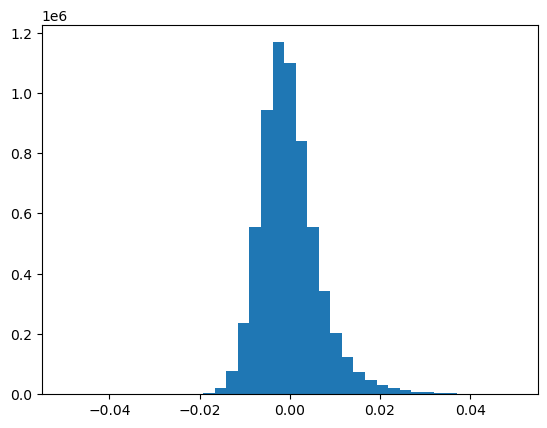

In [11]:
plt.hist(hers_map[hers_map != 0], bins=np.linspace(-.05, .05, 40));

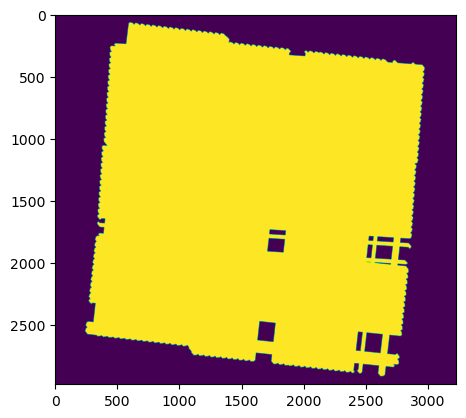

In [12]:
plt.imshow(hers_mask_jk1);

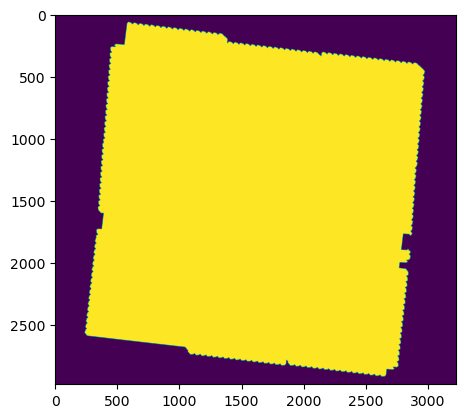

In [13]:
plt.imshow(hers_mask_jk2);

# Loop over HERS maps

In [10]:
shortcut = False
wvs = ['PSW','PMW','PLW']
fft_dict = {}
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        xcorr_label = 'x'.join([wv1,wv2])
        if iwv == jwv:
            print('Estimating {}'.format(xcorr_label))
            
            fft_dict[xcorr_label] = {}
            hers1 = hers_obj.maps['jk1'][wv1] / spire_solid_angle[iwv] * hipe_8_11_calibration_correction[iwv] * spire_color_correction[iwv]
            hers_mask1 = hers_obj.masks['jk1'][wv1]
            hers2 = hers_obj.maps['jk2'][wv2] / spire_solid_angle[jwv] * hipe_8_11_calibration_correction[jwv] * spire_color_correction[jwv]
            hers_mask2 = hers_obj.masks['jk2'][wv2]
            pix_arcsec = hers_obj.pix_sizes_arcsec['jk2'][wv1]

            fft_dict[xcorr_label]['fft_hers'] = get_twod_ifft(hers1, hers2, pix_arcsec=pix_arcsec)

            #pdb.set_trace()
            ell_bins, hers_mask_pk = get_mc_mkk(hers_mask1, hers_mask2, deltal=deltal, width=width, pix_arcsec=pix_arcsec)
            fft_dict[xcorr_label]['mkk_hers'] = np.linalg.inv(hers_mask_pk)

            k_map=get_k_from_map(hers1,pix_arcsec)
            fft_dict[xcorr_label]['pk_hers'], fft_dict[xcorr_label]['ell_hers'] = bin_in_rings(fft_dict[xcorr_label]['fft_hers'], ell_bins, k_map)
            #pdb.set_trace()
        elif iwv < jwv:
            print('Estimating {}'.format(xcorr_label))
            
            fft_dict[xcorr_label] = {}
            hers1 = hers_obj.maps['combined'][wv1] / spire_solid_angle[iwv] * hipe_8_11_calibration_correction[iwv] * spire_color_correction[iwv]
            hers_mask1 = hers_obj.masks['combined'][wv1]
            hers2 = hers_obj.maps['combined'][wv2] / spire_solid_angle[jwv] * hipe_8_11_calibration_correction[jwv] * spire_color_correction[jwv]
            hers_mask2 = hers_obj.masks['combined'][wv2]
            pix_arcsec = hers_obj.pix_sizes_arcsec['combined'][wv1]

            fft_dict[xcorr_label]['fft_hers'] = get_twod_ifft(hers1, hers2, pix_arcsec=pix_arcsec)

            ell_bins, hers_mask_pk = get_mc_mkk(hers_mask1, hers_mask2, deltal=deltal, width=width, pix_arcsec=pix_arcsec)
            fft_dict[xcorr_label]['mkk_hers'] = np.linalg.inv(hers_mask_pk)

            k_map=get_k_from_map(hers1,pix_arcsec)
            fft_dict[xcorr_label]['pk_hers'], fft_dict[xcorr_label]['ell_hers'] = bin_in_rings(fft_dict[xcorr_label]['fft_hers'], ell_bins, k_map)
            #pdb.set_trace()

Estimating PSWxPSW
Estimating PSWxPMW
Estimating PSWxPLW
Estimating PMWxPMW
Estimating PMWxPLW
Estimating PLWxPLW


In [7]:
shortcut = False
wvs = ['PSW','PMW','PLW']
fft_dict = {}
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        xcorr_label = 'x'.join([wv1,wv2])
        if iwv == jwv:
            print('Estimating {}'.format(xcorr_label))
            
            fft_dict[xcorr_label] = {}
            hers1 = hers_obj.maps['jk1'][wv1] / spire_solid_angle[iwv] * hipe_8_11_calibration_correction[iwv] * spire_color_correction[iwv]
            hers_mask1 = hers_obj.masks['jk1'][wv1]
            hers2 = hers_obj.maps['jk2'][wv2] / spire_solid_angle[jwv] * hipe_8_11_calibration_correction[jwv] * spire_color_correction[jwv]
            hers_mask2 = hers_obj.masks['jk2'][wv2]
            pix_arcsec = hers_obj.pix_sizes_arcsec['jk2'][wv1]

            fft_dict[xcorr_label]['fft_hers'] = get_twod_ifft(hers1, hers2, pix_arcsec=pix_arcsec)

            ell_bins, hers_mask_pk = get_mc_mkk(hers_mask1, hers_mask2, deltal=deltal, width=width, pix_arcsec=pix_arcsec)
            fft_dict[xcorr_label]['mkk_hers'] = np.linalg.inv(hers_mask_pk)

            k_map=get_k_from_map(hers1,pix_arcsec)
            fft_dict[xcorr_label]['pk_hers'], fft_dict[xcorr_label]['ell_hers'] = bin_in_rings(fft_dict[xcorr_label]['fft_hers'], ell_bins, k_map)
            #pdb.set_trace()


Estimating PSWxPSW
Estimating PMWxPMW
Estimating PLWxPLW


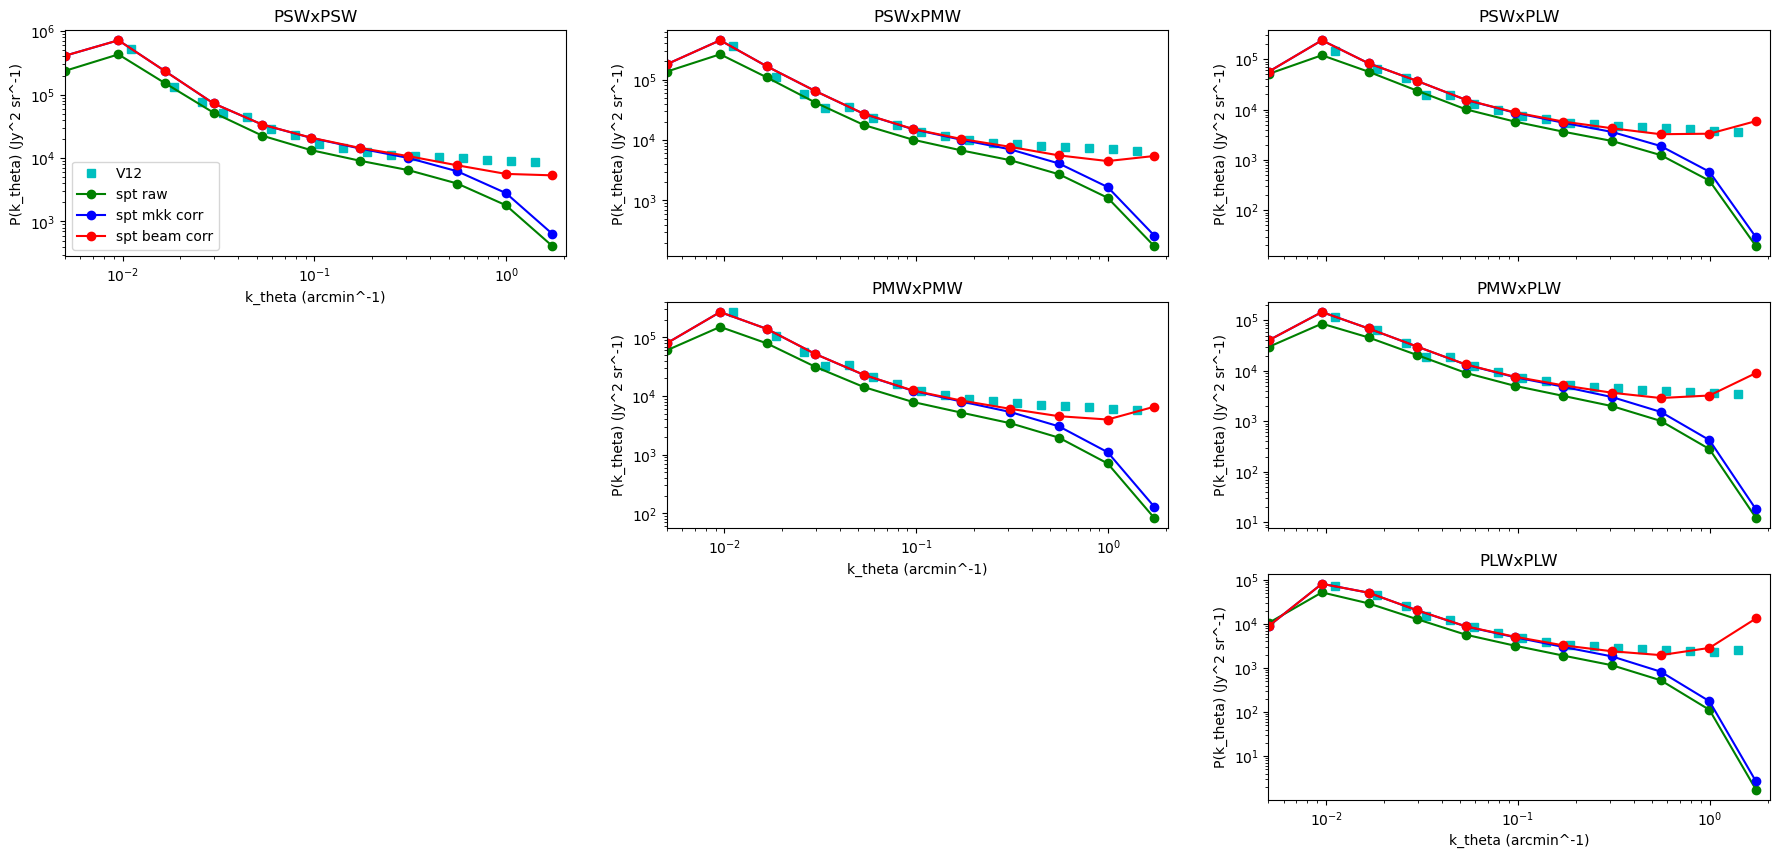

In [12]:
xs=3
ys=3

fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            ell = fft_dict[xcorr_label]['ell_hers']
            k_theta = ell_to_k(ell)
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 5e3*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            #fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            #zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            #fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            #fudge_factor = 1/((pix_arcsec/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1]))

            #print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            #print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            #print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            #multfac = 1/zero_factor # fsky / zero_factor #* 1e-6 #**2 * np.pi
            #print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='g', label='spt raw')
            #axs[ii,iii].plot(k_theta, 1/zero_factor * pk_hers/Bl, '--o', c='b', label='spt zero corr')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='b', label='spt mkk corr')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='spt beam corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
            
            if not ii and not iii:    
                axs[ii,iii].legend(loc='lower left');  
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1

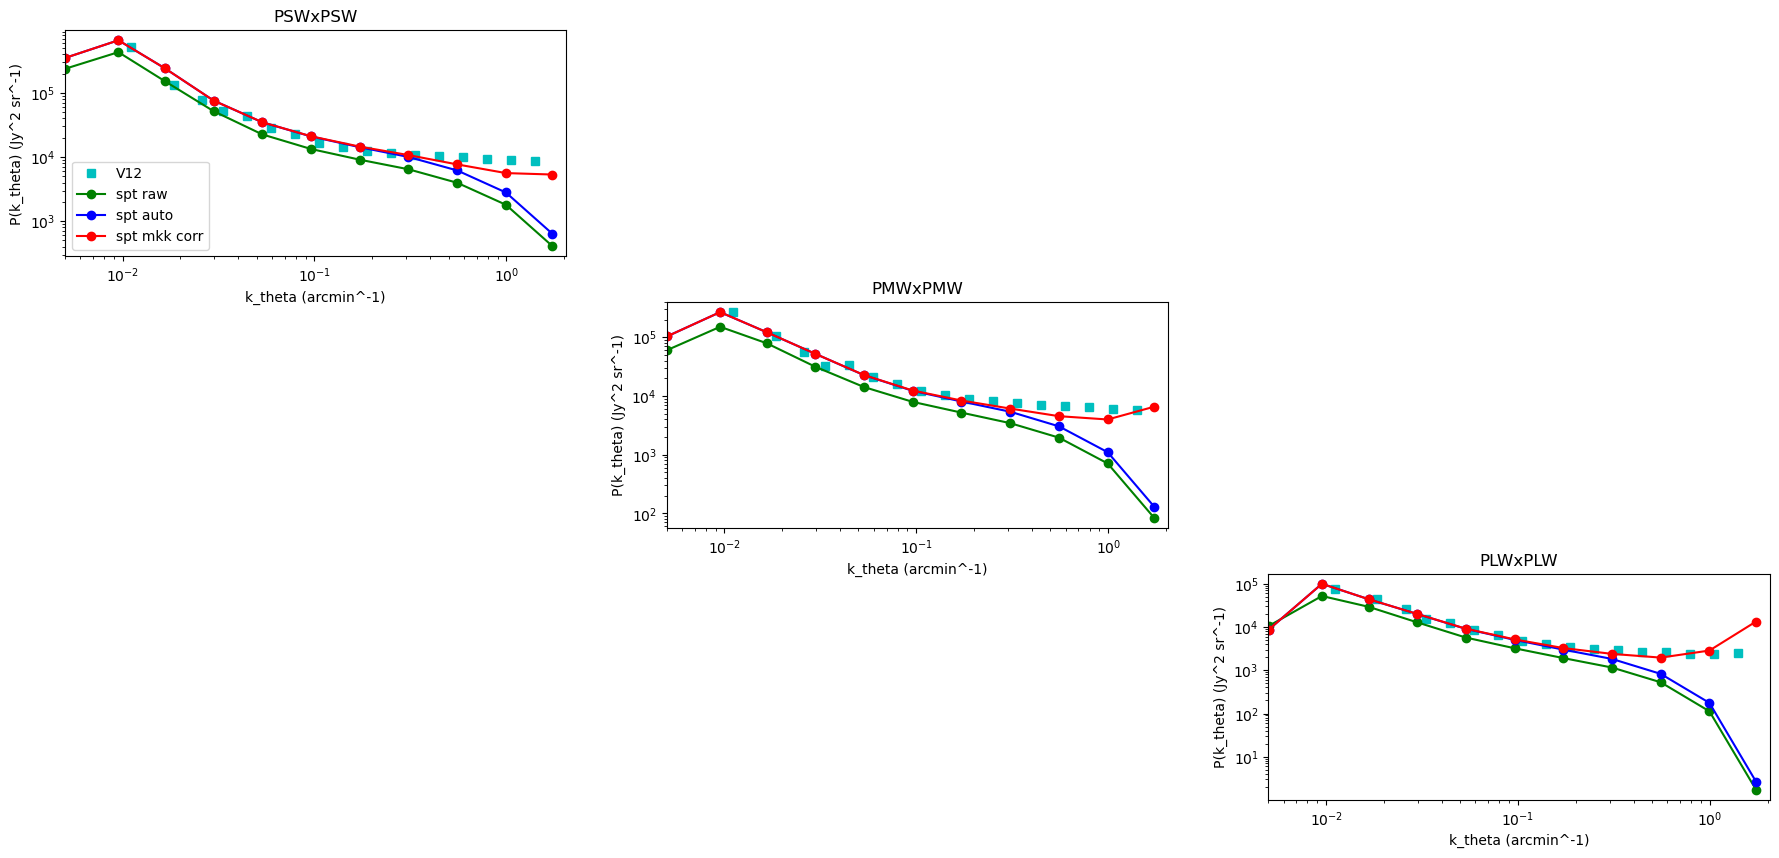

In [9]:
xs=3
ys=3

fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            ell = fft_dict[xcorr_label]['ell_hers']
            k_theta = ell_to_k(ell)
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 5e3*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            #fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            #zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            #fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            #fudge_factor = 1/((pix_arcsec/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1]))

            #print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            #print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            #print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            #multfac = 1/zero_factor # fsky / zero_factor #* 1e-6 #**2 * np.pi
            #print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='g', label='spt raw')
            #axs[ii,iii].plot(k_theta, 1/zero_factor * pk_hers/Bl, '--o', c='b', label='spt zero corr')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='b', label='spt auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='spt mkk corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
            
            if not ii and not iii:    
                axs[ii,iii].legend(loc='lower left');  
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1

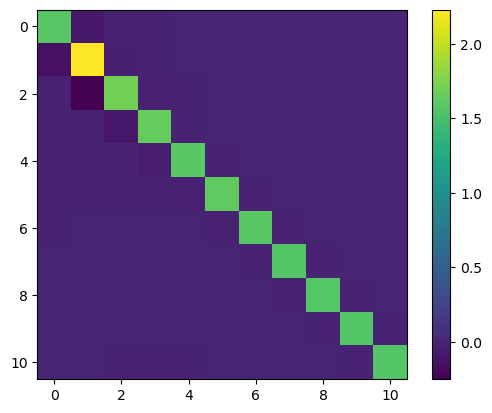

In [19]:
plt.imshow(mkk_hers)
plt.colorbar();

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.013
zero_factor_PSWxPSW = 0.145
6.891314093632137
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.013
zero_factor_PMWxPMW = 0.145
6.897318251817274
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.013
zero_factor_PLWxPLW = 0.143
6.995880219216943


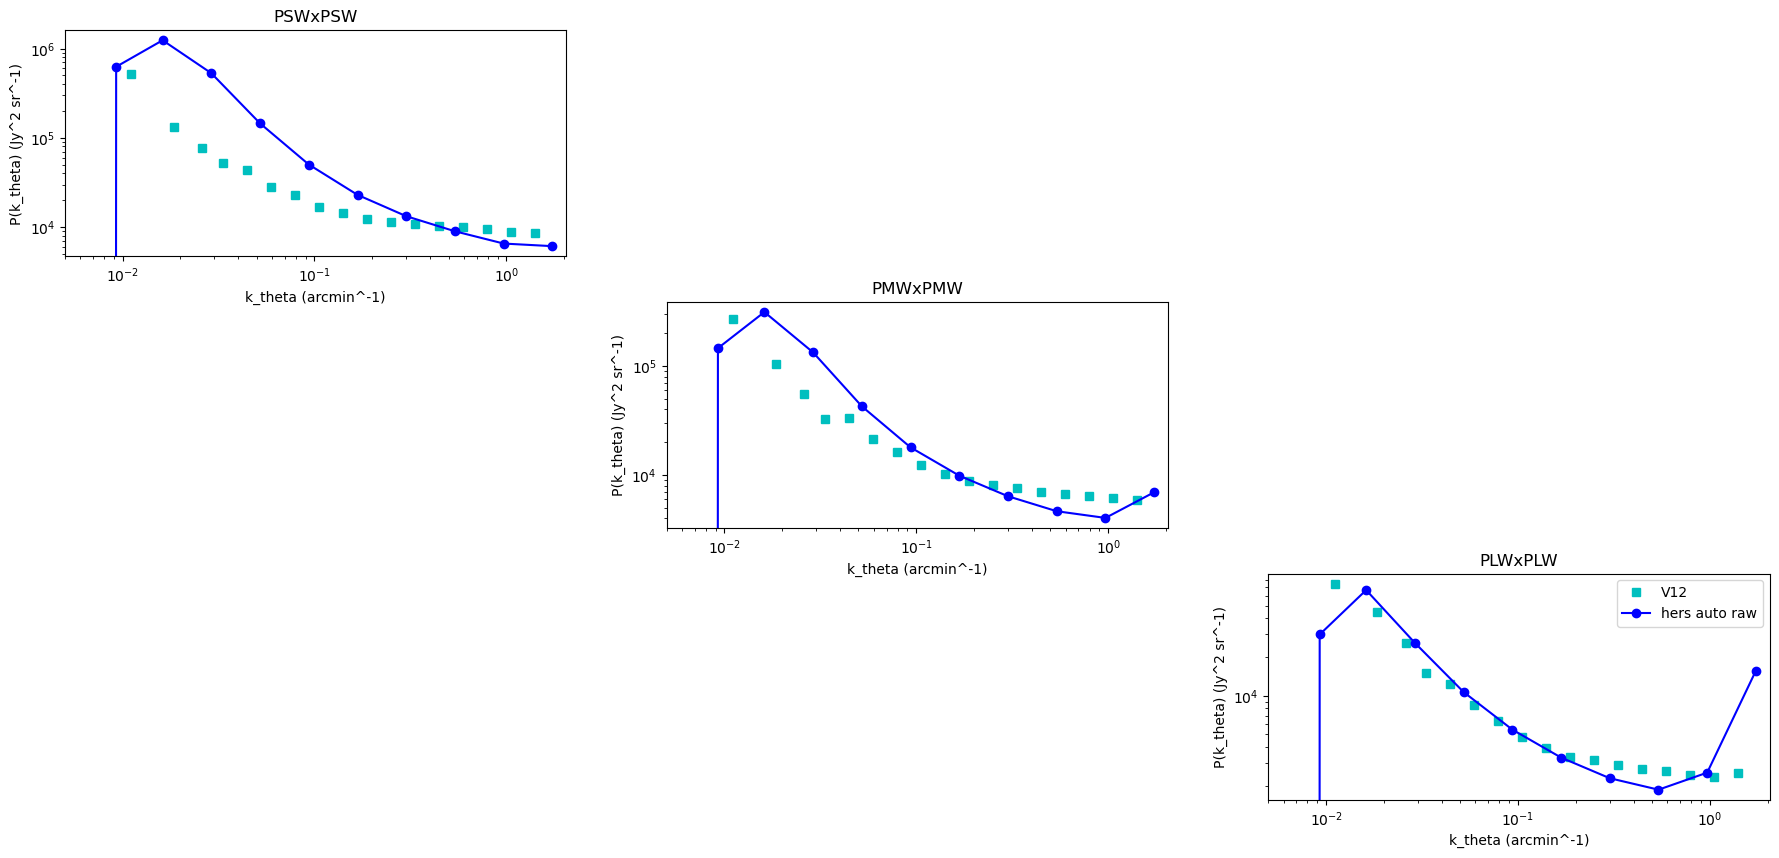

In [53]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac = 1/zero_factor # fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

In [49]:
pk_hers

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.003
zero_factor_PSWxPSW = 0.706
1.4164188572842977
fac_PSWxPMW = 1.000
fsky_PSWxPMW = 0.003
zero_factor_PSWxPMW = 0.706
1.4164188572842977
fac_PSWxPLW = 1.000
fsky_PSWxPLW = 0.003
zero_factor_PSWxPLW = 0.706
1.4164188572842977
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.003
zero_factor_PMWxPMW = 0.705
1.417652932927927
fac_PMWxPLW = 1.000
fsky_PMWxPLW = 0.003
zero_factor_PMWxPLW = 0.705
1.417652932927927
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.003
zero_factor_PLWxPLW = 0.695
1.4379110473222376


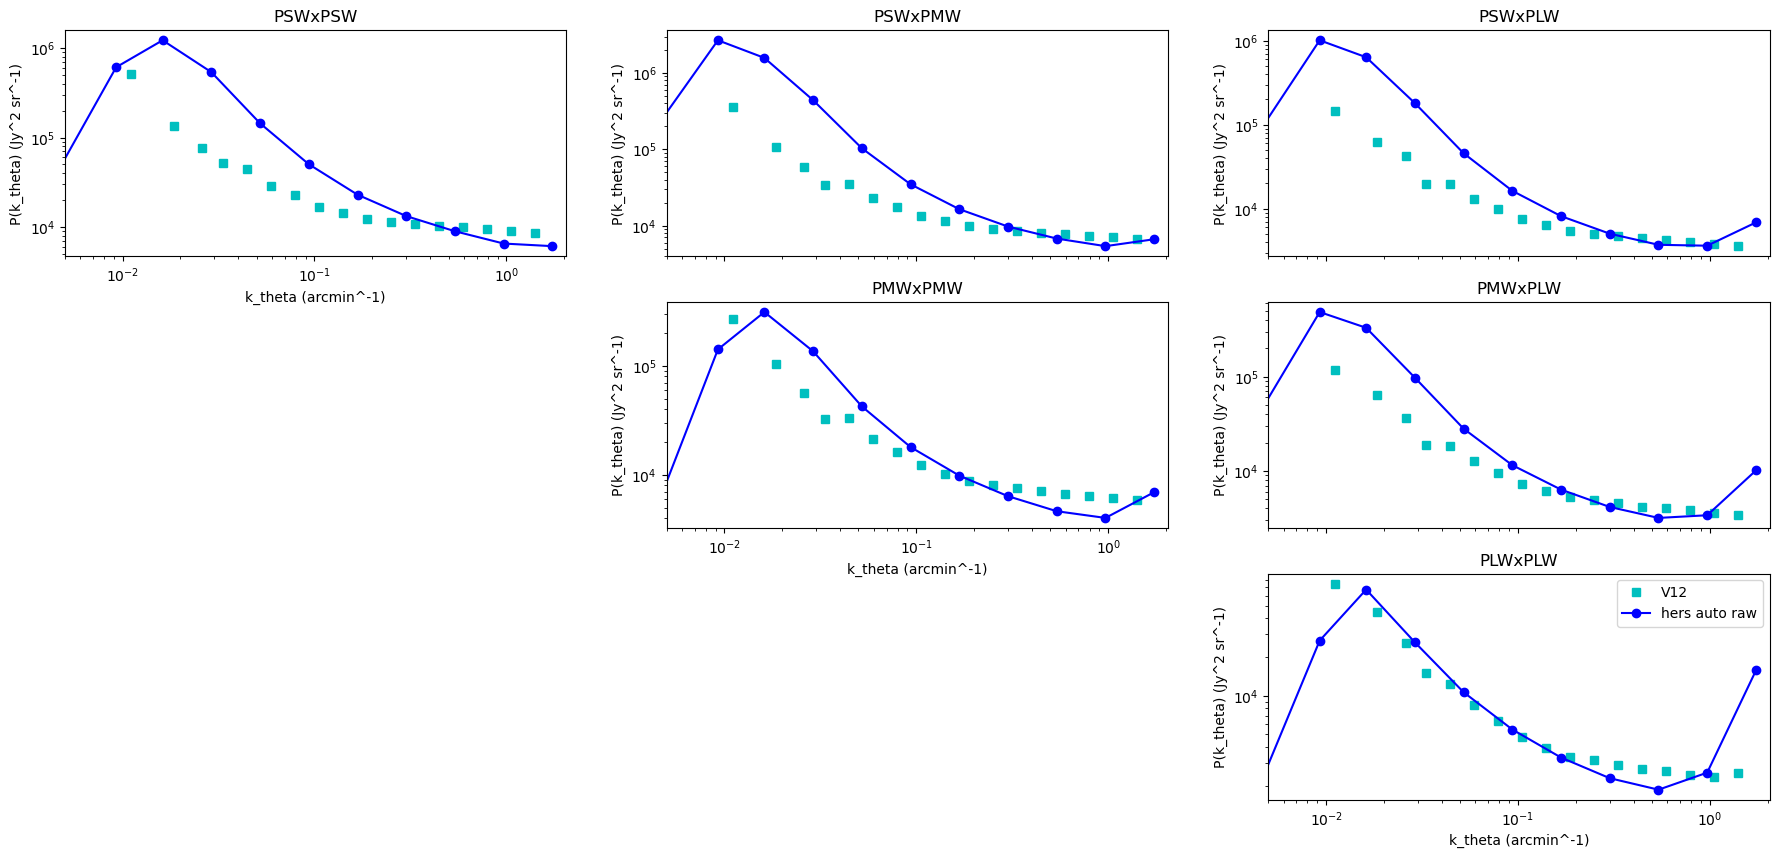

In [19]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac = 1/zero_factor # fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.004
zero_factor_PSWxPSW = 0.654
1.5296053362235966
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.004
zero_factor_PMWxPMW = 0.654
1.528644030739237
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.004
zero_factor_PLWxPLW = 0.651
1.5367950274311473


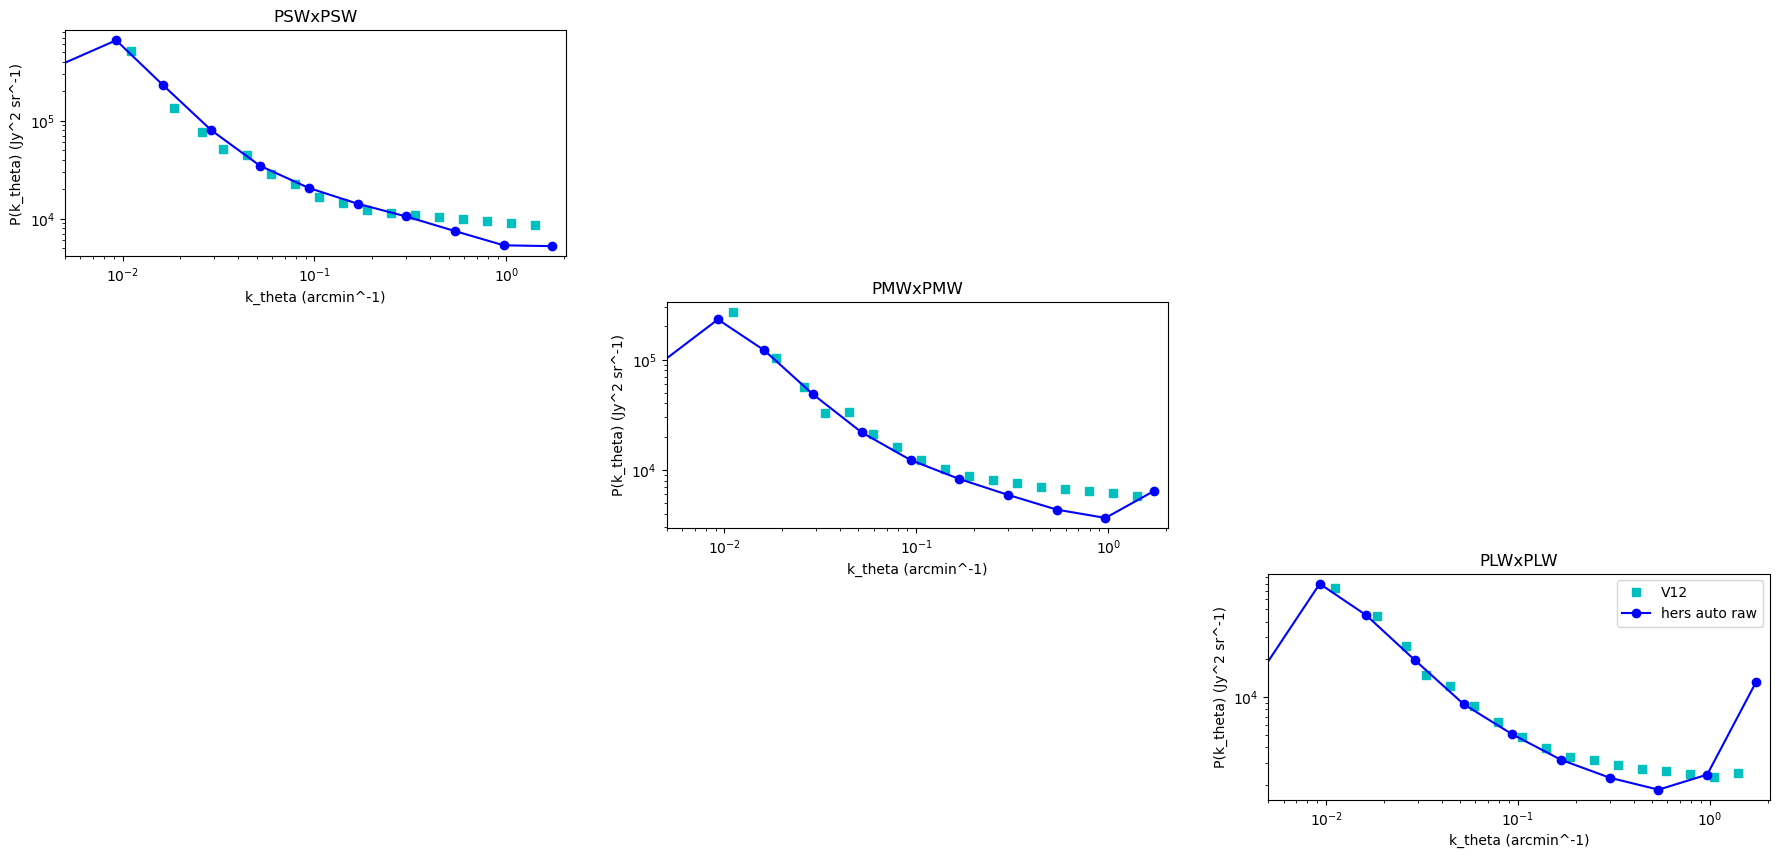

In [54]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac = 1/zero_factor # fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            #axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

In [53]:
zero_factor

0.6507048644421793

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.004
zero_factor_PSWxPSW = 0.654
0.006183982842912565
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.004
zero_factor_PMWxPMW = 0.654
0.0061800964177796906
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.004
zero_factor_PLWxPLW = 0.651
0.006213049770191402


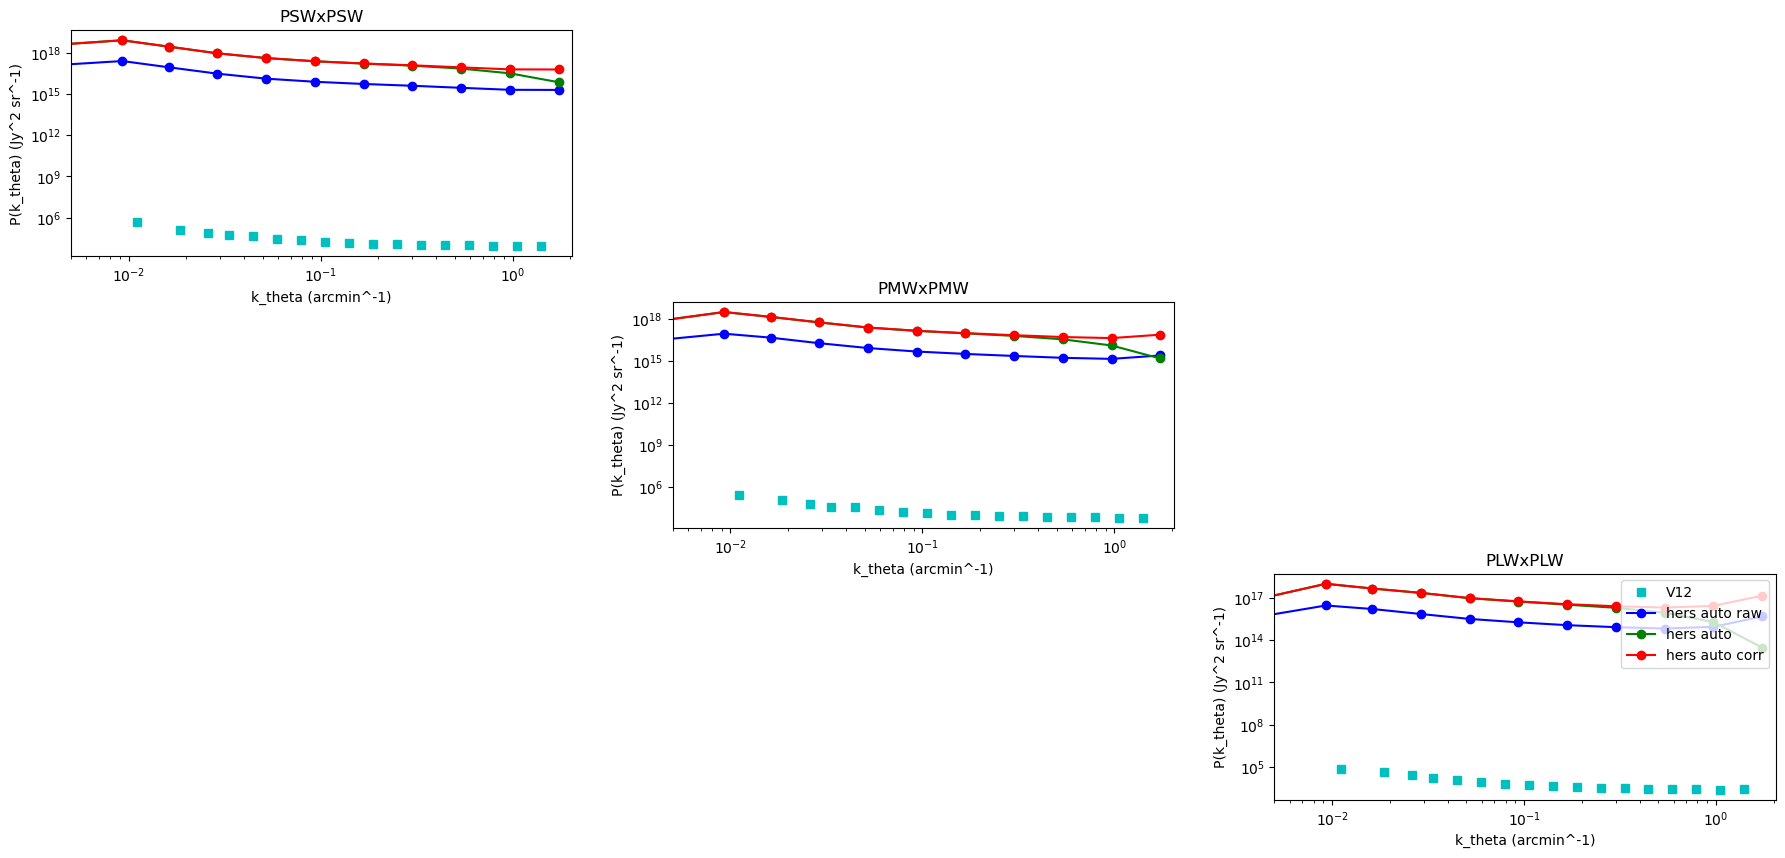

In [42]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac =  fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.004
zero_factor_PSWxPSW = 0.654
0.006183982842912565
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.004
zero_factor_PMWxPMW = 0.654
0.0061800964177796906
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.004
zero_factor_PLWxPLW = 0.651
0.006213049770191402


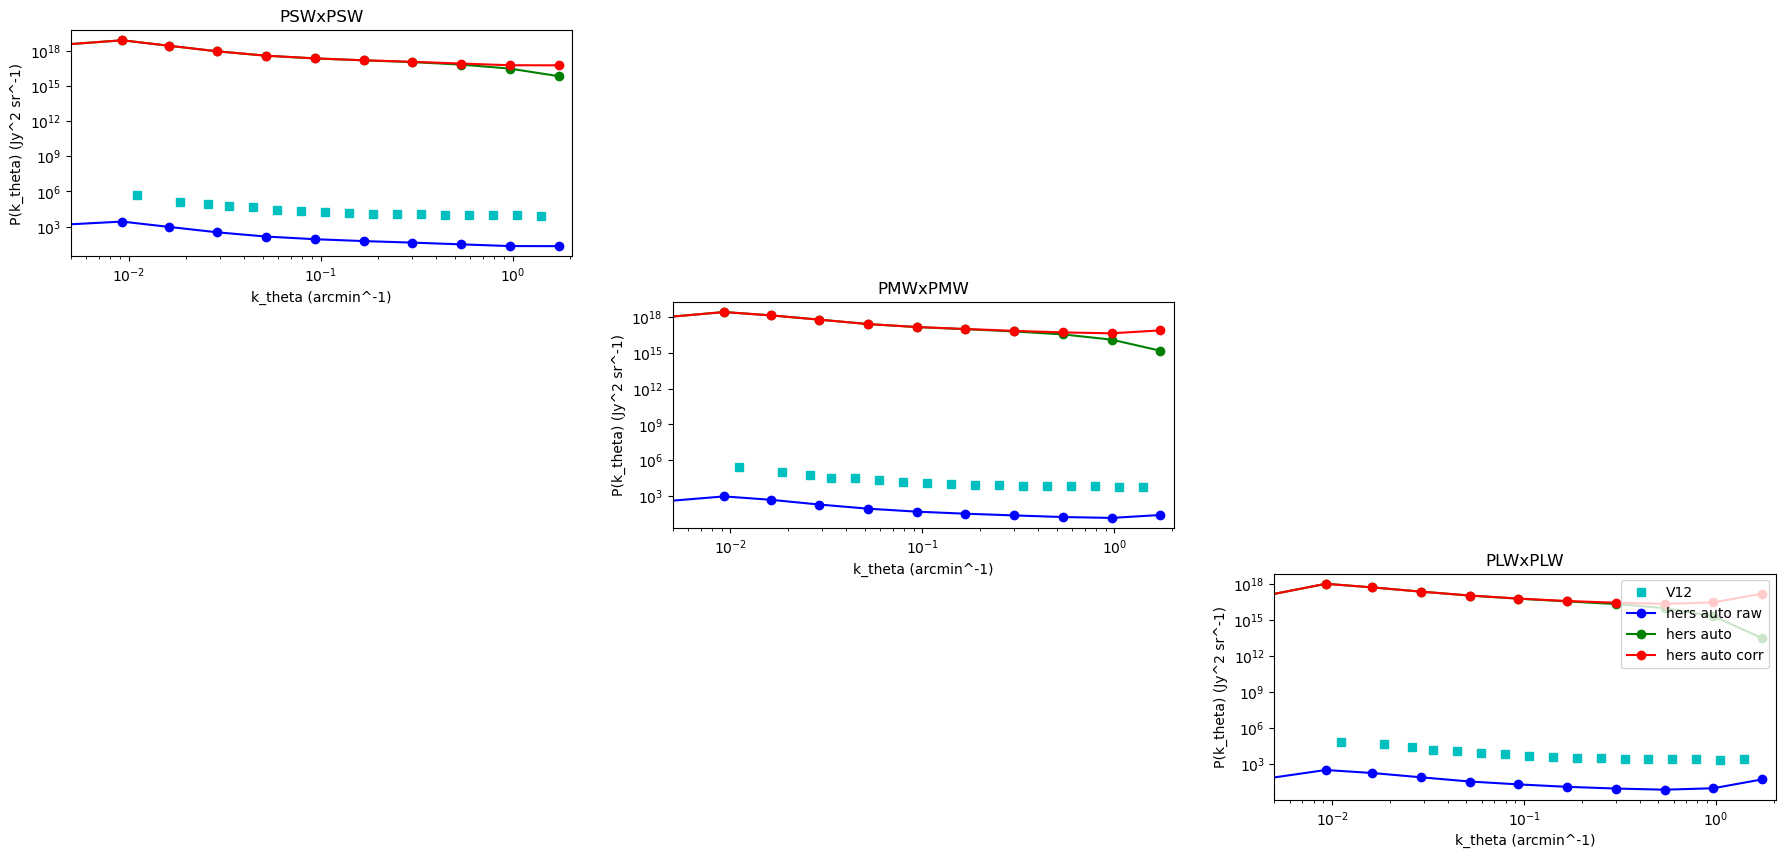

In [39]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac =  fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.004
zero_factor_PSWxPSW = 0.654
0.009459053155634226
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.004
zero_factor_PMWxPMW = 0.654
0.009447167498431866
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.004
zero_factor_PLWxPLW = 0.651
0.009548183992012379


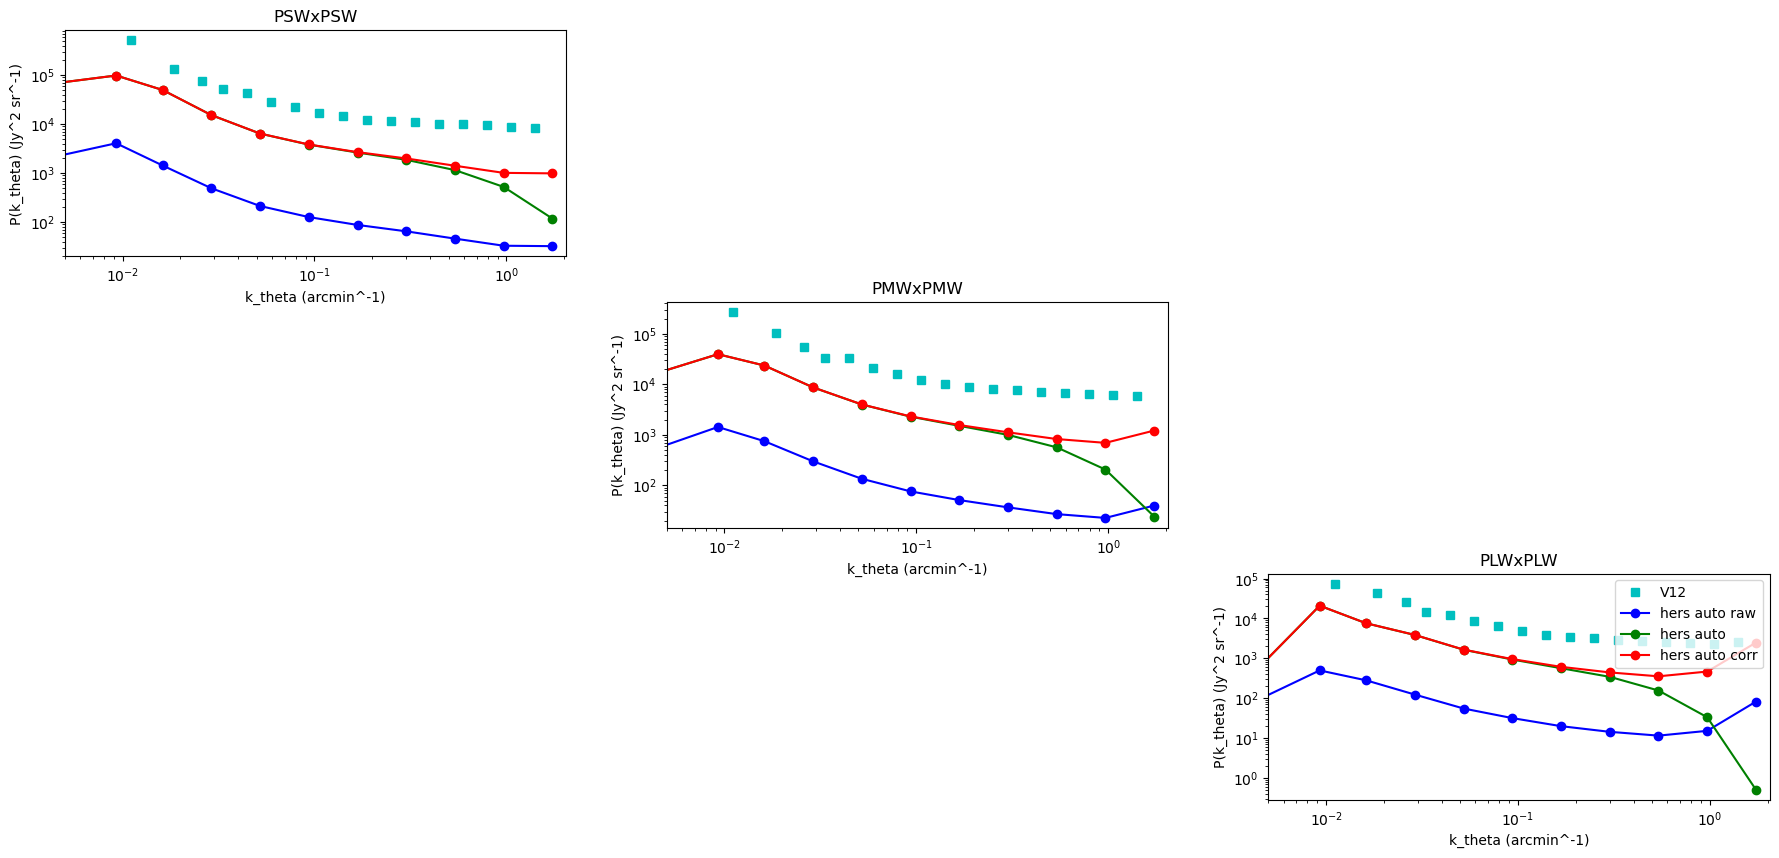

In [35]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac =  fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, multfac*pk_hers/Bl, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

fac_PSWxPSW = 1.000
fsky_PSWxPSW = 0.004
zero_factor_PSWxPSW = 0.654
0.006183982842912565
fac_PMWxPMW = 1.000
fsky_PMWxPMW = 0.004
zero_factor_PMWxPMW = 0.654
0.0061800964177796906
fac_PLWxPLW = 1.000
fsky_PLWxPLW = 0.004
zero_factor_PLWxPLW = 0.651
0.006213049770191402


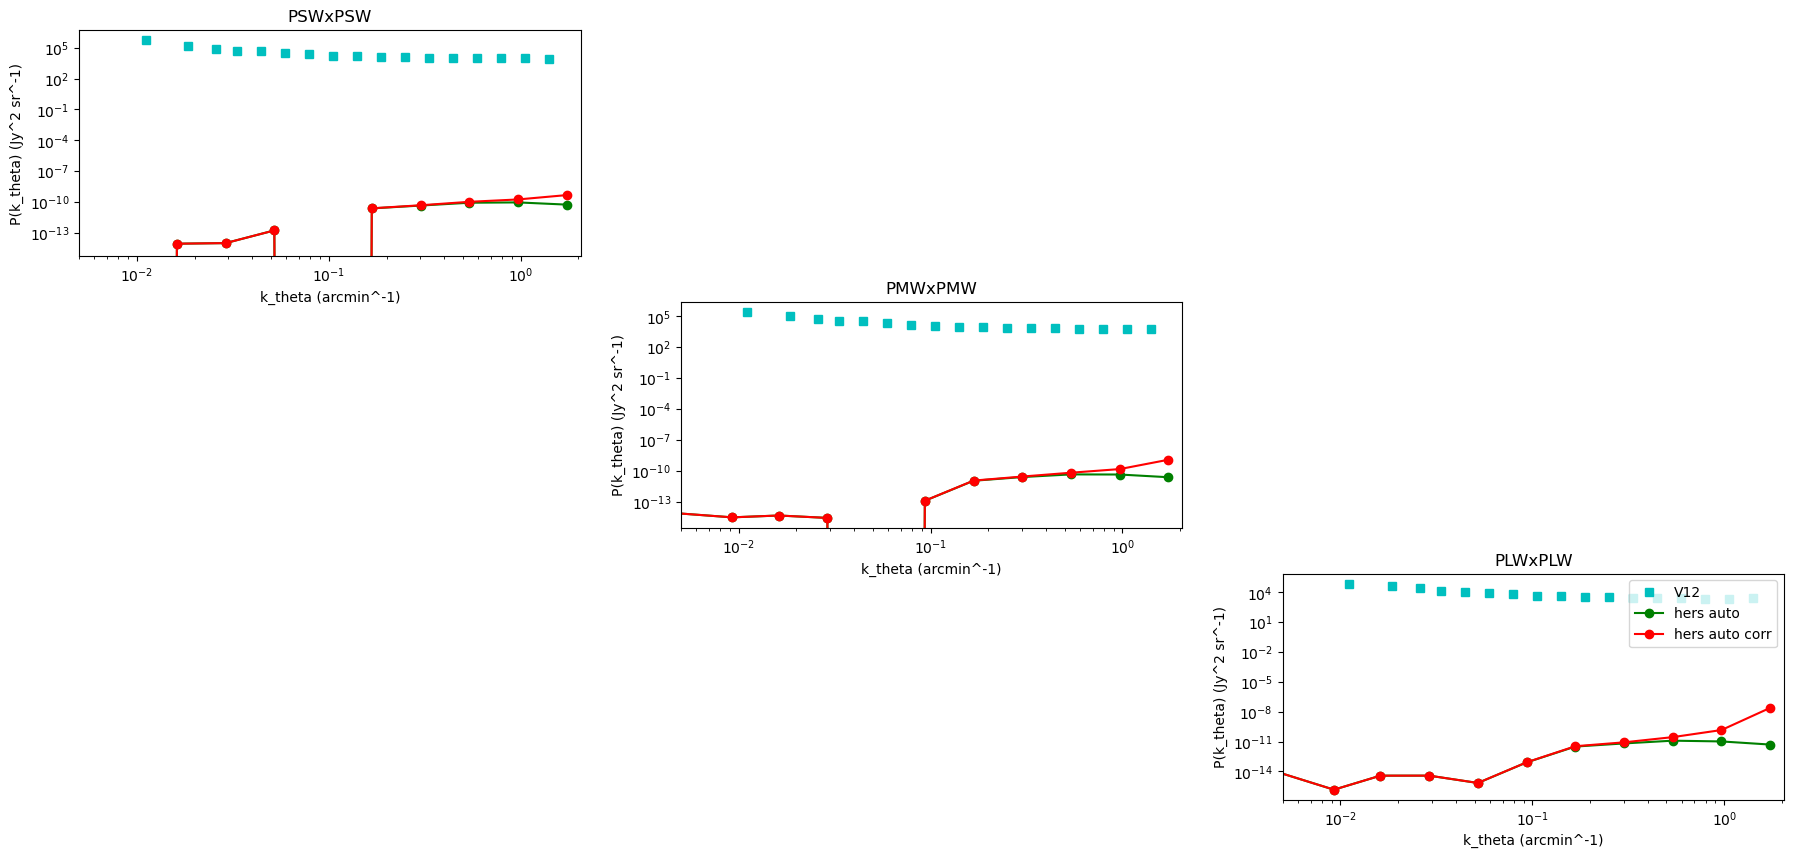

In [141]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = 1 #(hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac = fsky / zero_factor #* 1e-6 #**2 * np.pi
            print(multfac)
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        #pdb.set_trace()
        i+=1
        
            
plt.legend(loc='upper right');            

fac_PSWxPSW = 0.033
fsky_PSWxPSW = 0.003
zero_factor_PSWxPSW = 0.706
fac_PSWxPMW = 0.033
fsky_PSWxPMW = 0.003
zero_factor_PSWxPMW = 0.706
fac_PSWxPLW = 0.033
fsky_PSWxPLW = 0.003
zero_factor_PSWxPLW = 0.706
fac_PMWxPMW = 0.033
fsky_PMWxPMW = 0.003
zero_factor_PMWxPMW = 0.705
fac_PMWxPLW = 0.033
fsky_PMWxPLW = 0.003
zero_factor_PMWxPLW = 0.705
fac_PLWxPLW = 0.033
fsky_PLWxPLW = 0.003
zero_factor_PLWxPLW = 0.695


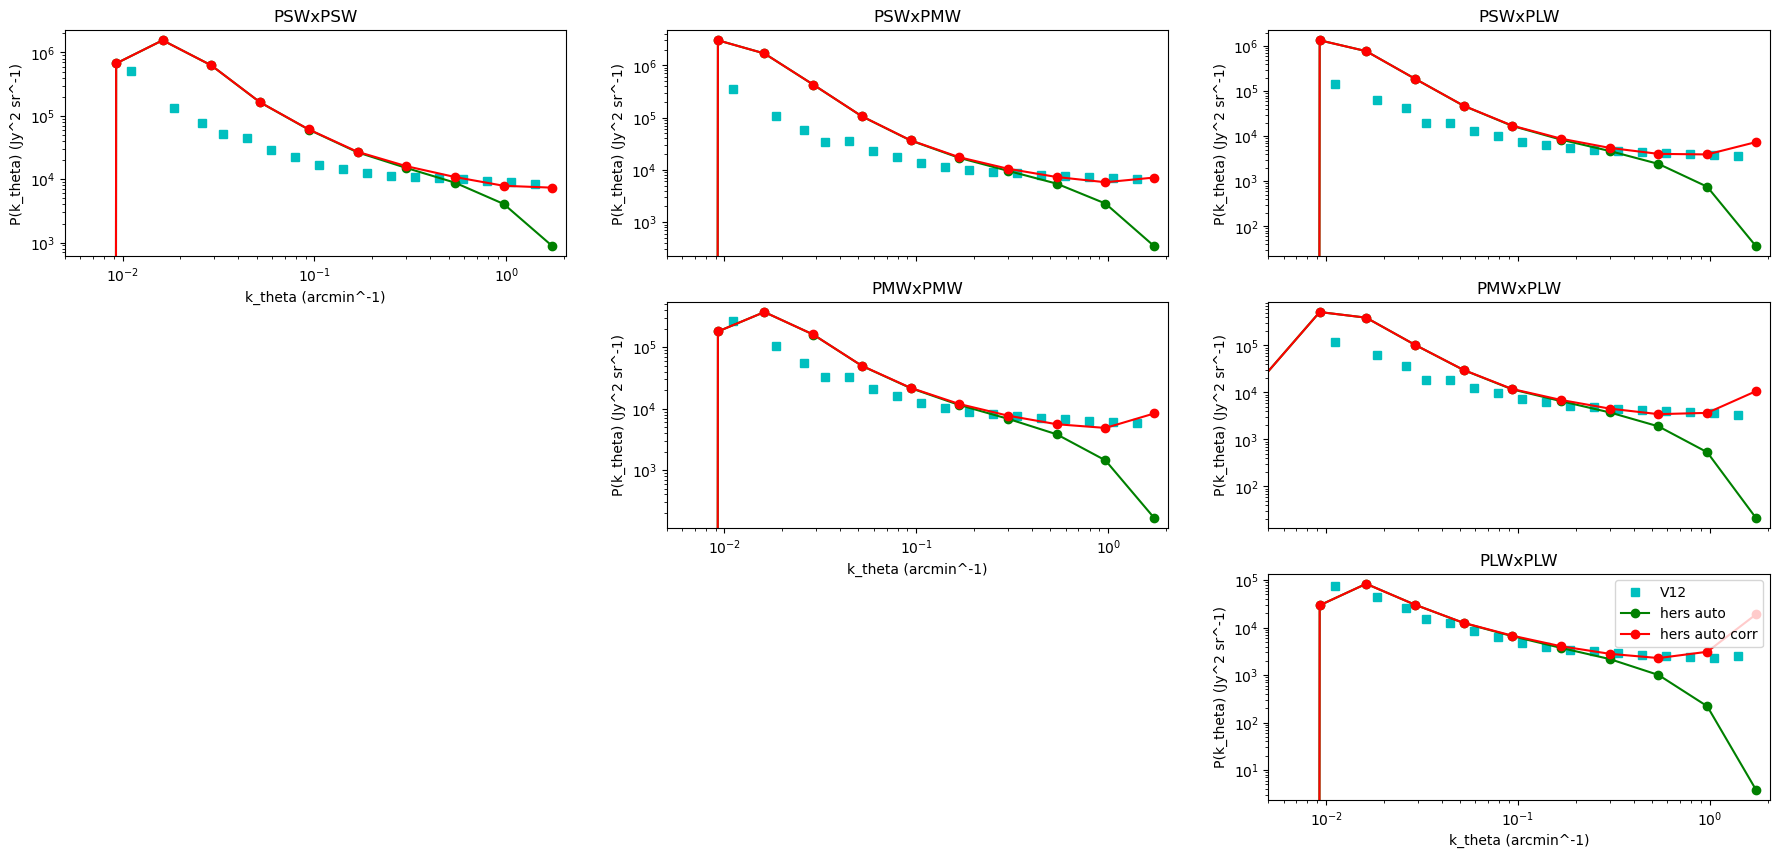

In [28]:
xs=3
ys=3

ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            hers_tst = hers_obj.maps['combined'][wv1]
            hers_mask_jk1 = hers_obj.maps['jk1'][wv1]
            hers_mask_jk2 = hers_obj.maps['jk2'][wv1]
            hers_pix = hers_obj.pix_sizes_arcsec['combined'][wv1]
            dims_tst = np.shape(hers_tst)
            fsky = (np.product(dims_tst) * (hers_pix / 3600 / 180 * np.pi)**2) / (4 * np.pi)
            zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims_tst)
            fac = (hers_pix/3600 * (np.pi/180))**2 * (dims_tst[0]*dims_tst[1])
            print('fac_{0} = {1:0.3f}'.format(xcorr_label, fac))
            print('fsky_{0} = {1:0.3f}'.format(xcorr_label, fsky))
            print('zero_factor_{0} = {1:0.3f}'.format(xcorr_label, zero_factor))
            multfac = fsky / zero_factor * 1e-6**2 * np.pi
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(fac*pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

11.9999988


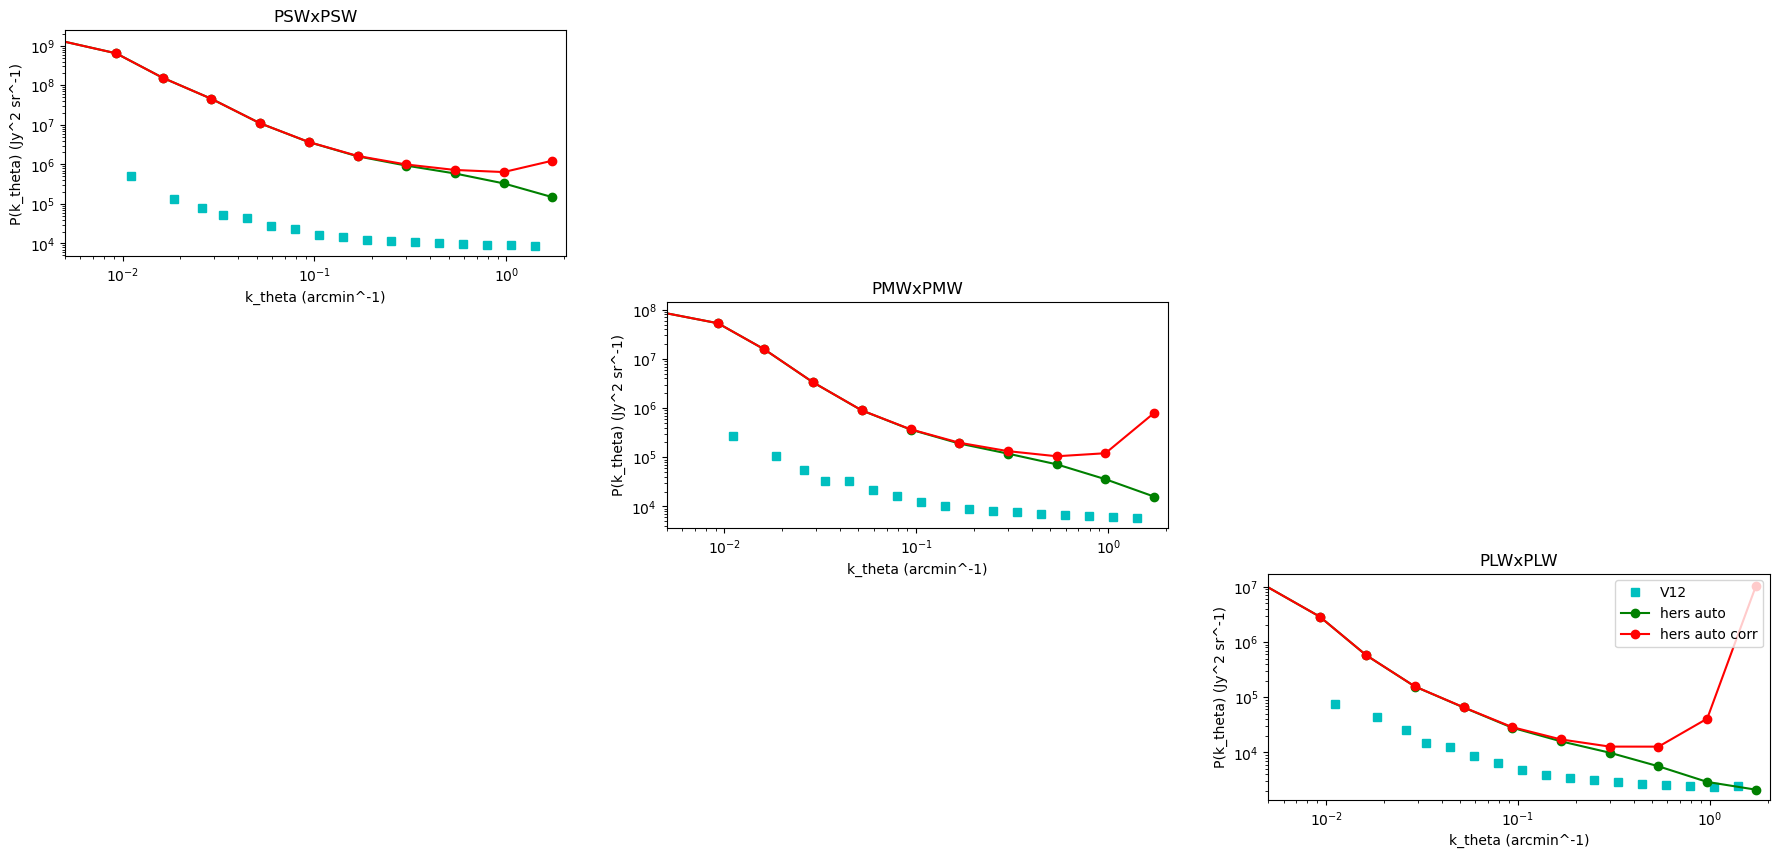

In [11]:
xs=3
ys=3
dims = np.shape(hers_mask_jk2)
pix_arcsec = hers_obj.pix_sizes_arcsec['combined']['PLW']
print(pix_arcsec)
fsky = (np.product(dims) * (pix_arcsec / 3600 / 180 * np.pi)**2) / (4 * np.pi)
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
multfac = fsky / zero_factor * 1e-6**2 * 1e-1
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

7.425000000000001


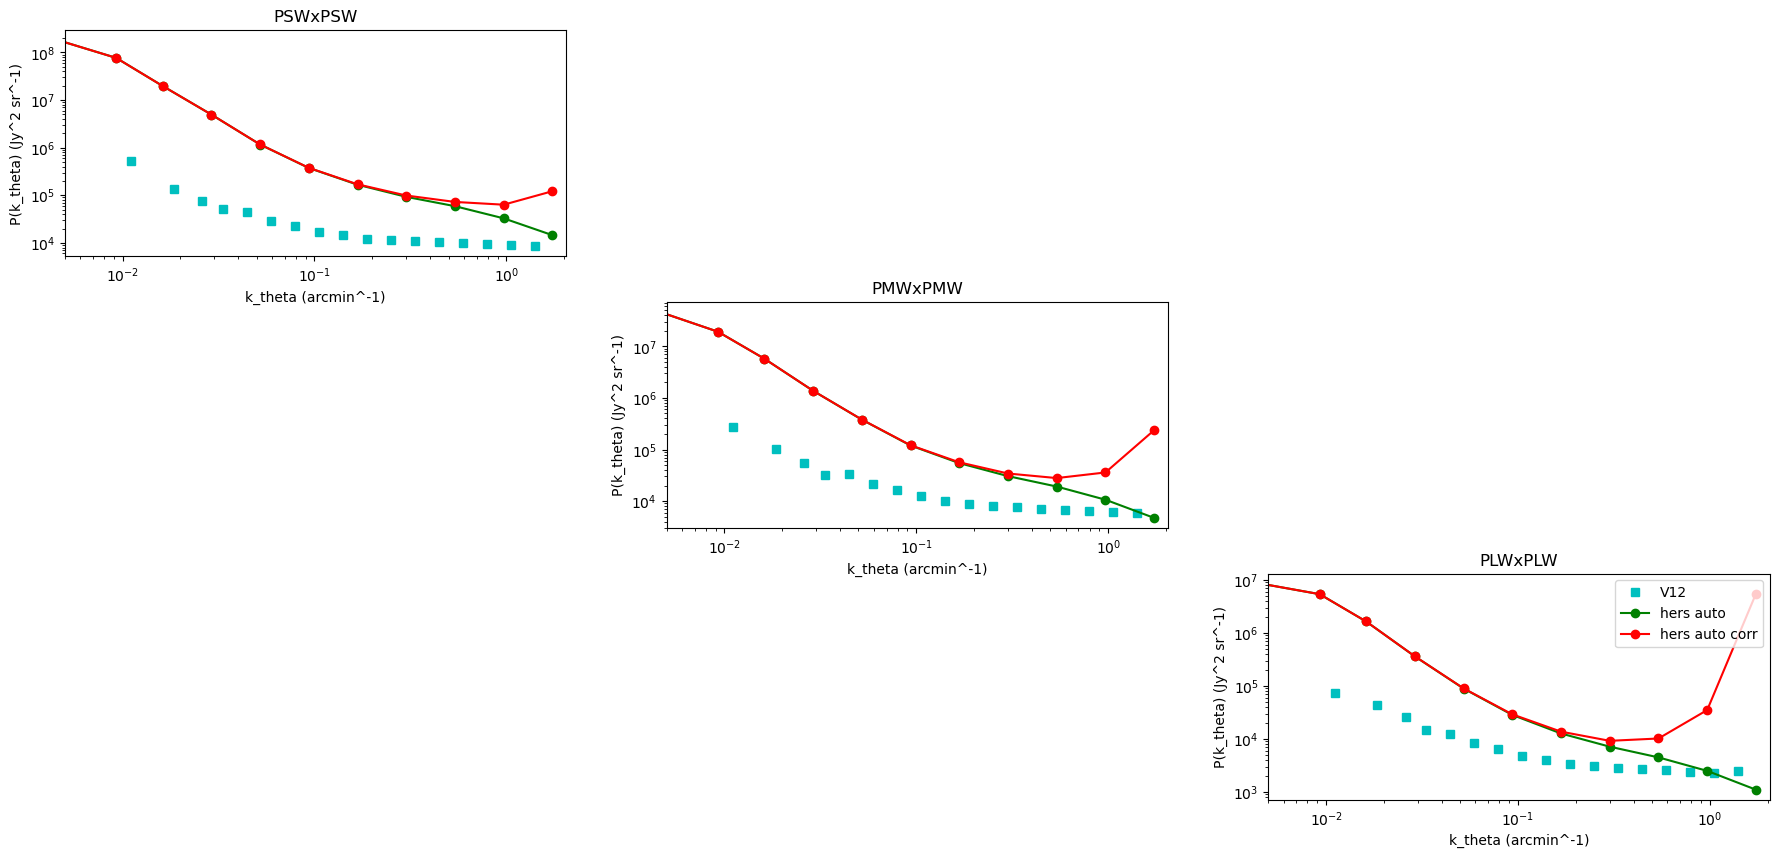

In [18]:
xs=3
ys=3
dims = np.shape(hers_mask_jk2)
pix_arcsec = hers_obj.pix_sizes_arcsec['combined']['PLW']
print(pix_arcsec)
fsky = (np.product(dims) * (pix_arcsec / 3600 / 180 * np.pi)**2) / (4 * np.pi)
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
multfac = fsky / zero_factor * 1e-6**2 * 1e-1
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv == jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

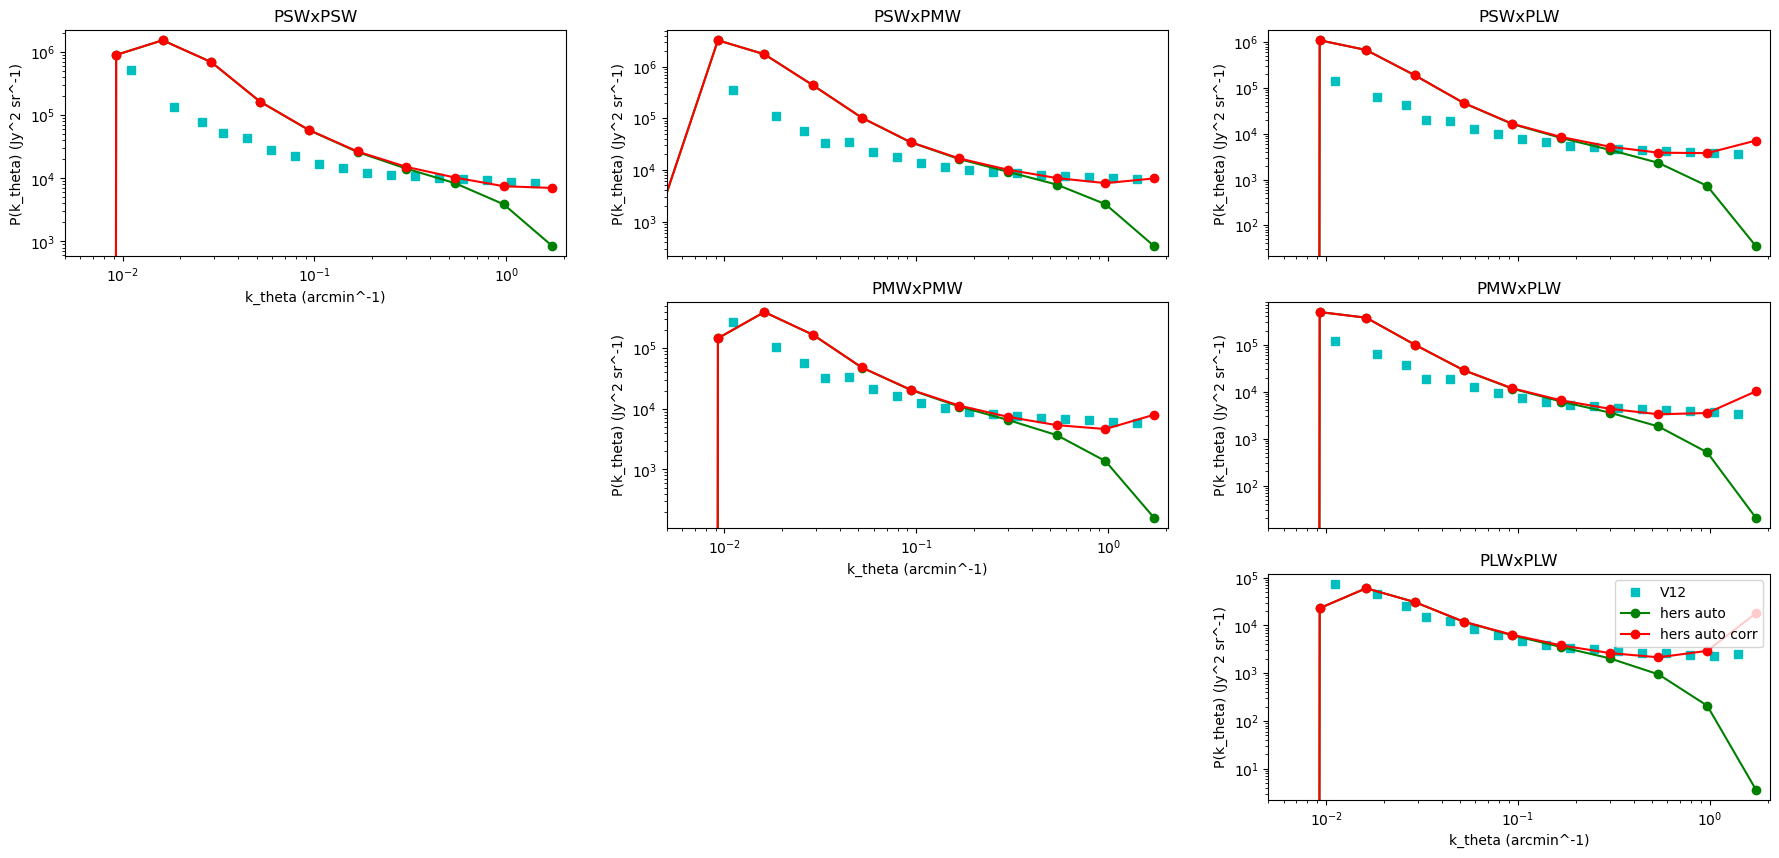

In [13]:
xs=3
ys=3
dims = np.shape(hers)
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
multfac = fsky / zero_factor * 1e-6**2 * 1e-1
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

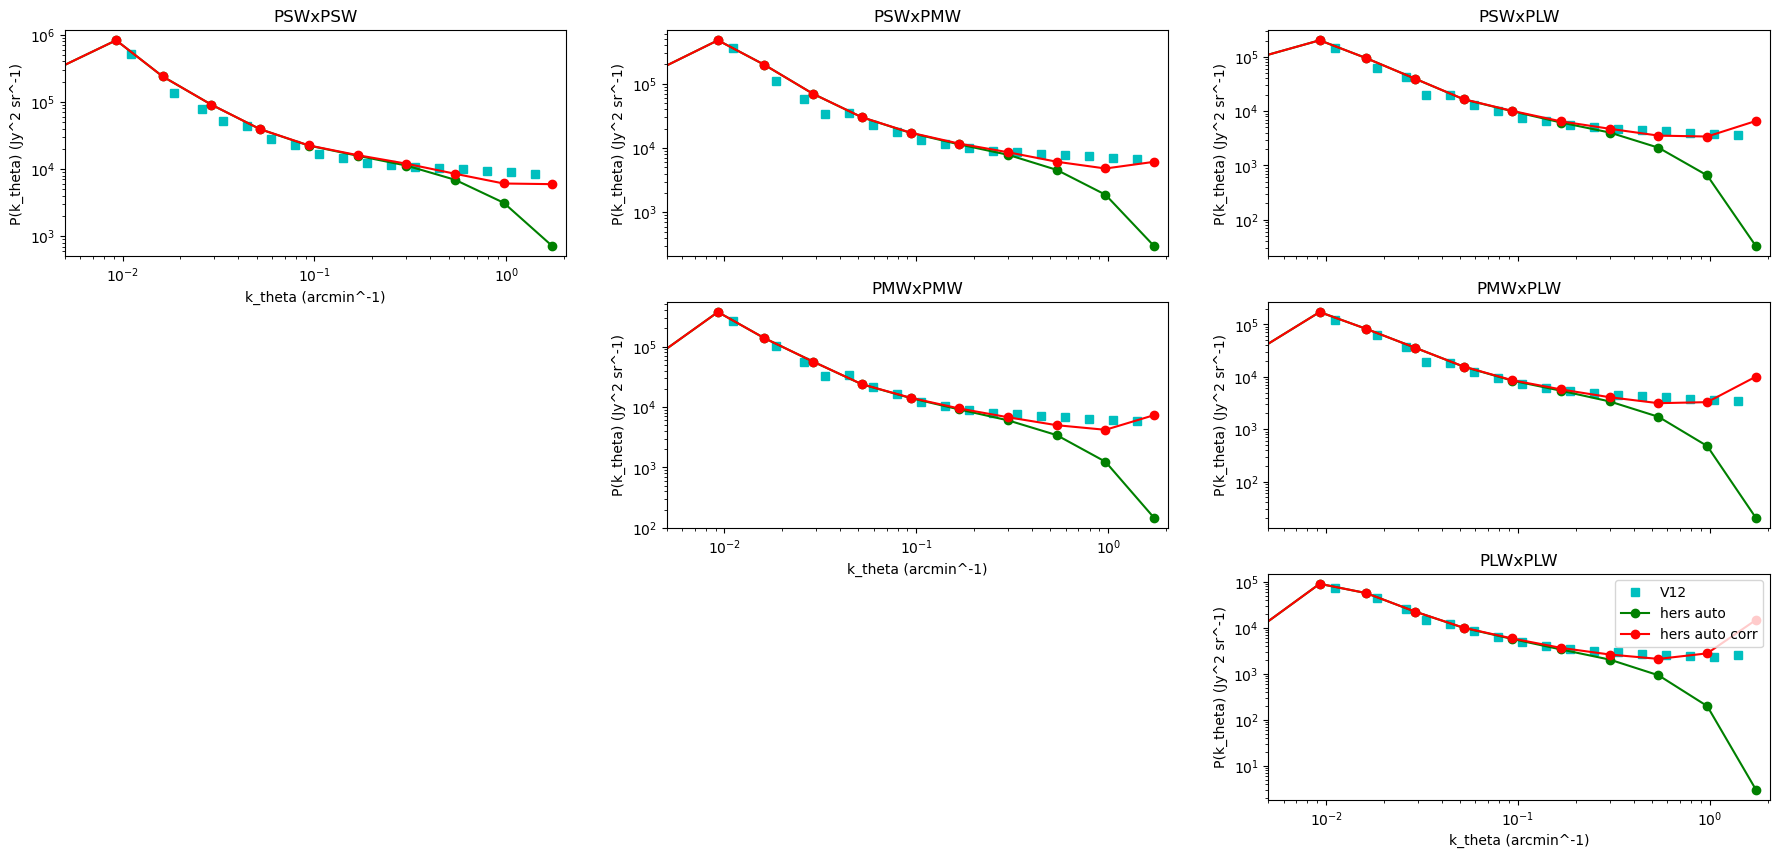

In [18]:
xs=3
ys=3
dims = np.shape(hers)
zero_factor = 1 - (np.sum(hers_mask_jk1==0)+np.sum(hers_mask_jk2==0))/2/np.prod(dims)
multfac = fsky / zero_factor * 1e-6**2 * 1e-1
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            #axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

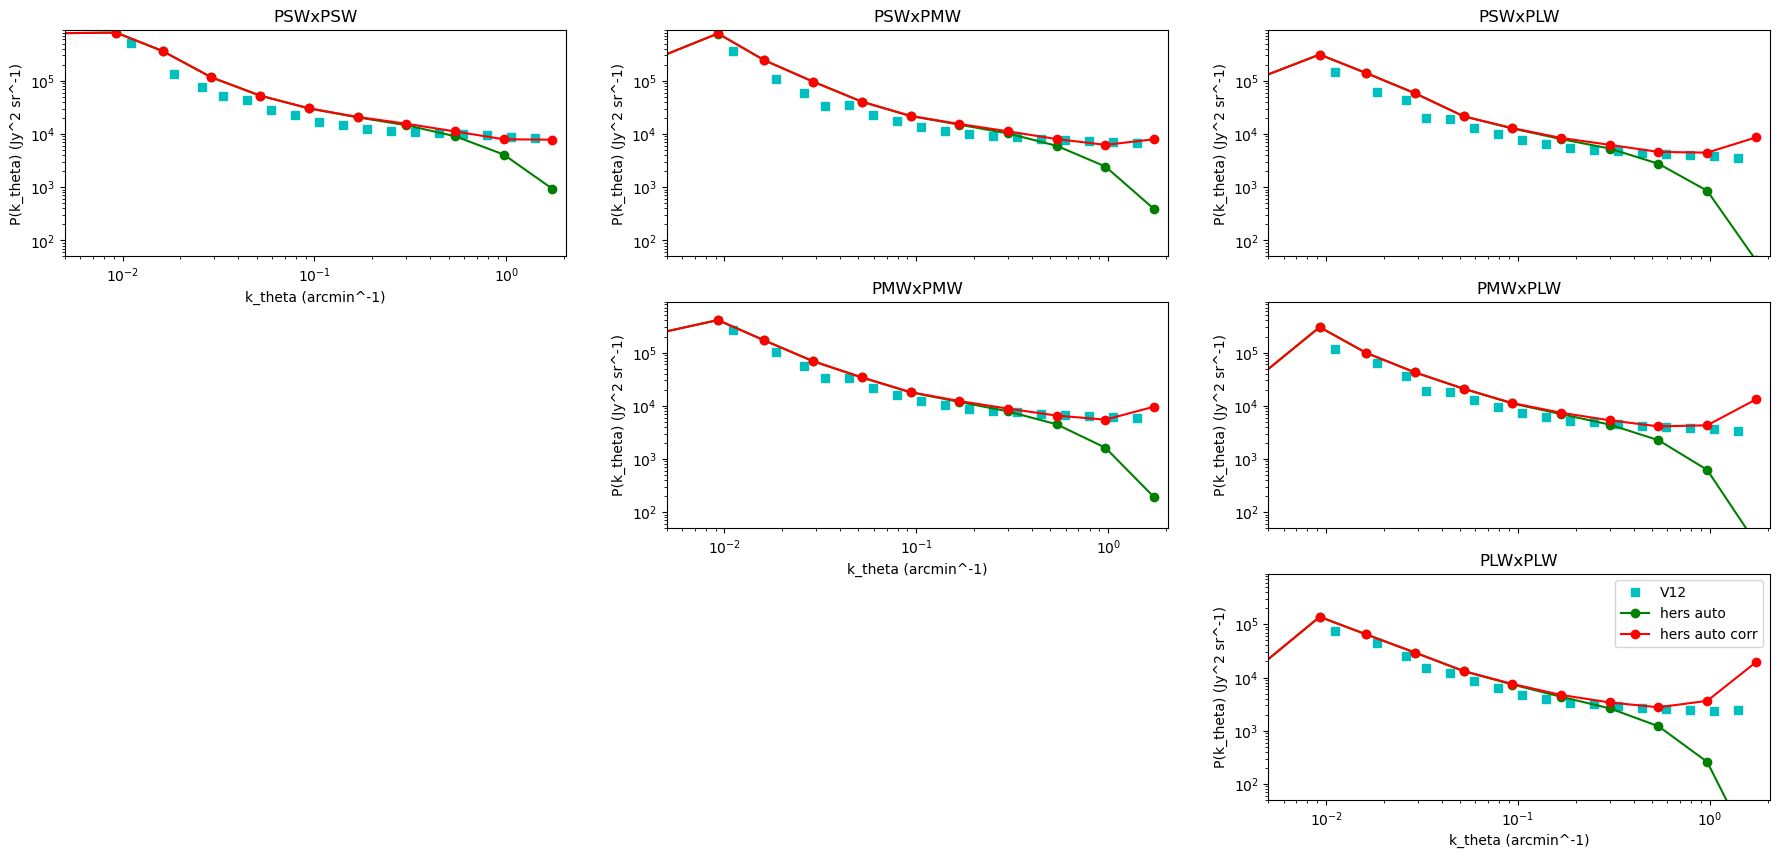

In [44]:
xs=3
ys=3
multfac = fsky * 1e-13
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

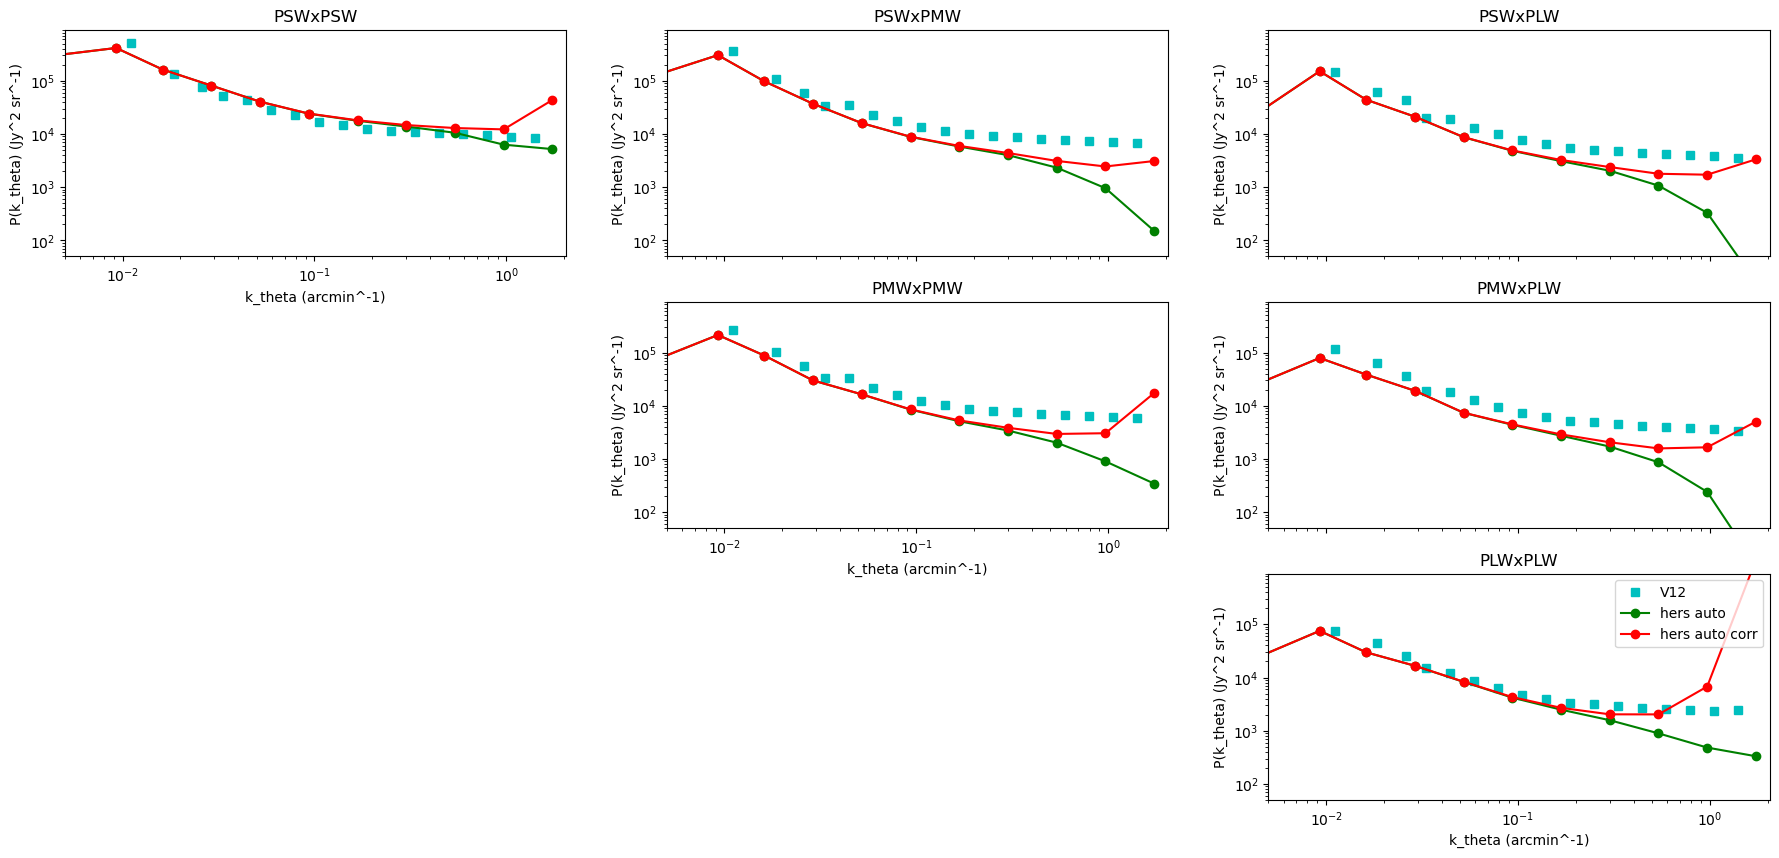

In [14]:
xs=3
ys=3
multfac = 0.15*1e-15
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

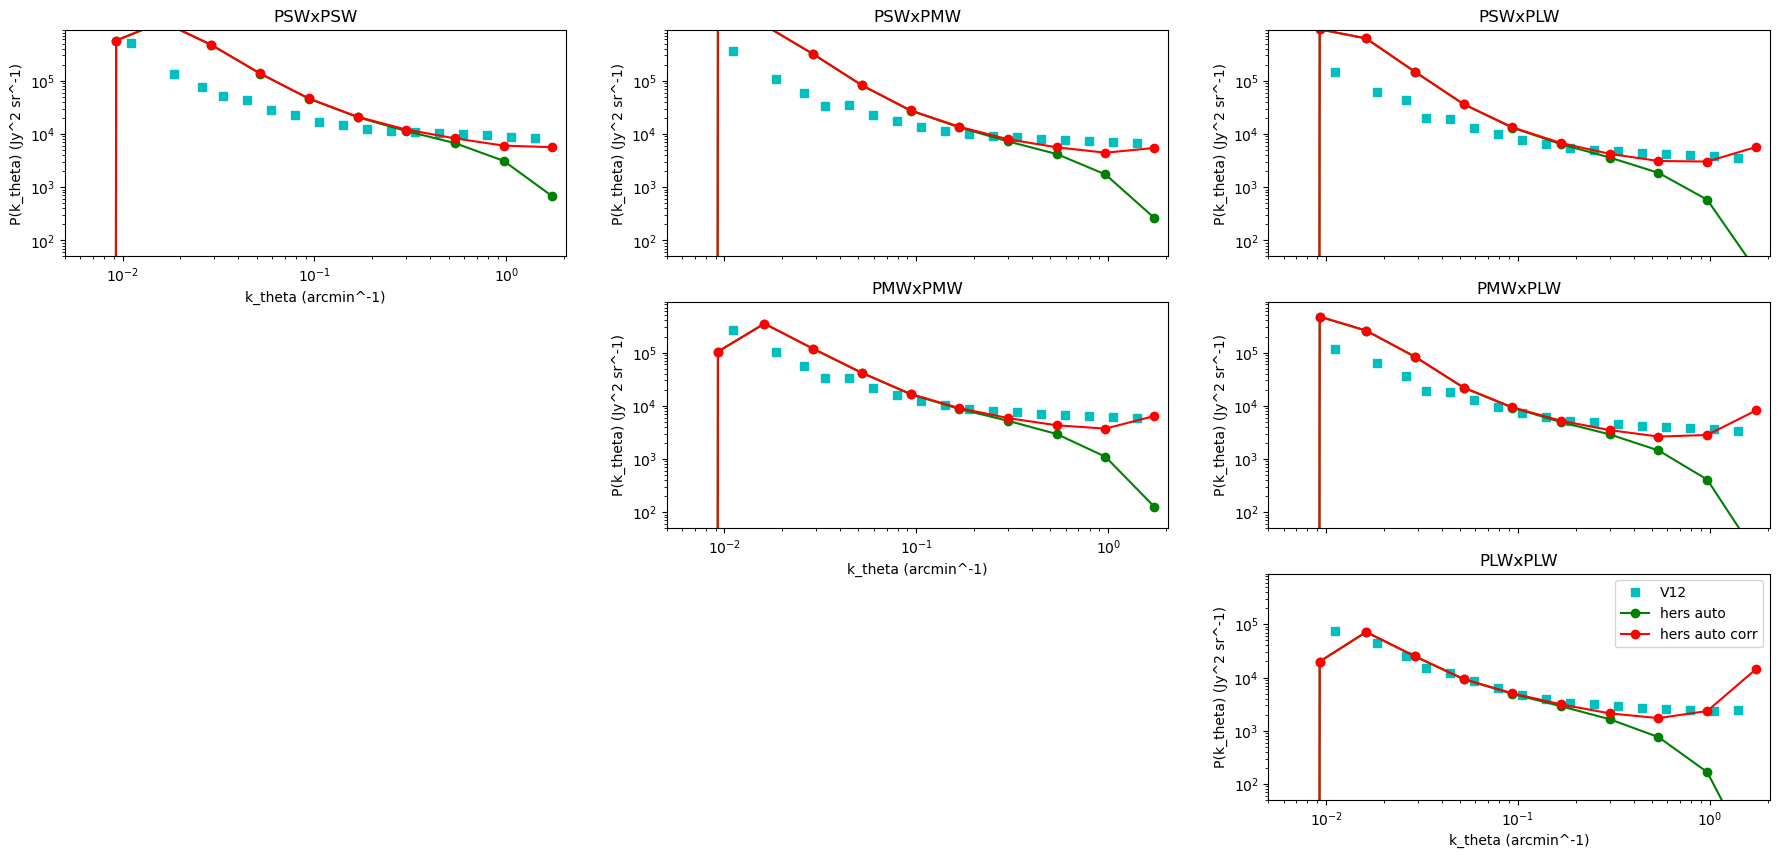

In [13]:
xs=3
ys=3
multfac = 0.15*1e-15
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

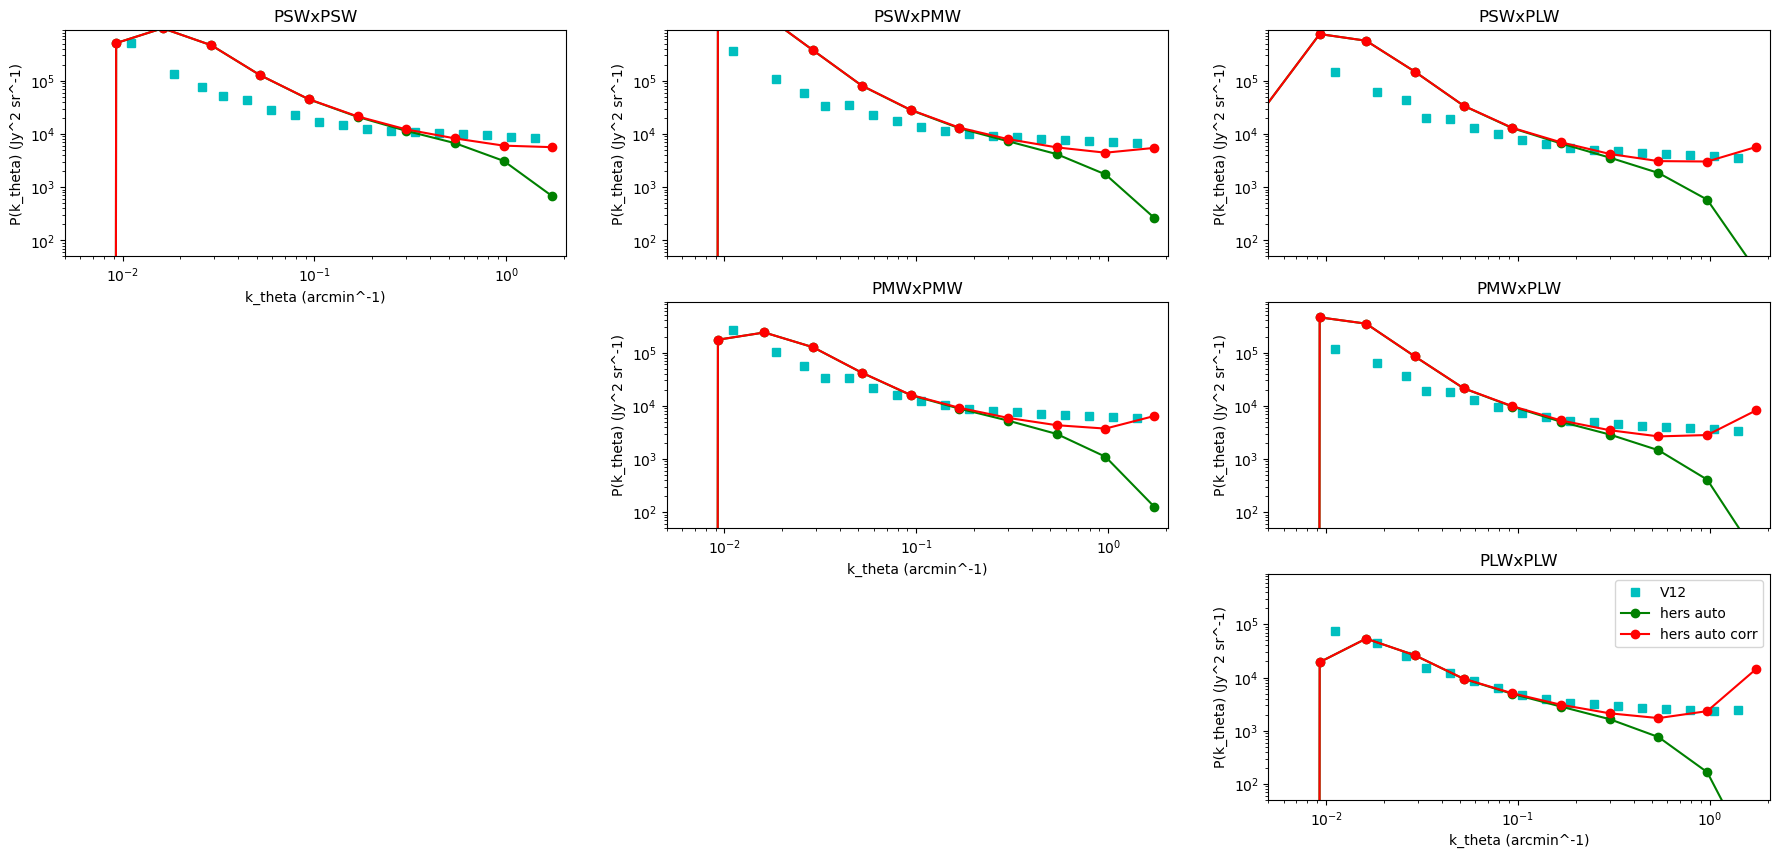

In [14]:
xs=3
ys=3
multfac = 0.15*1e-15
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

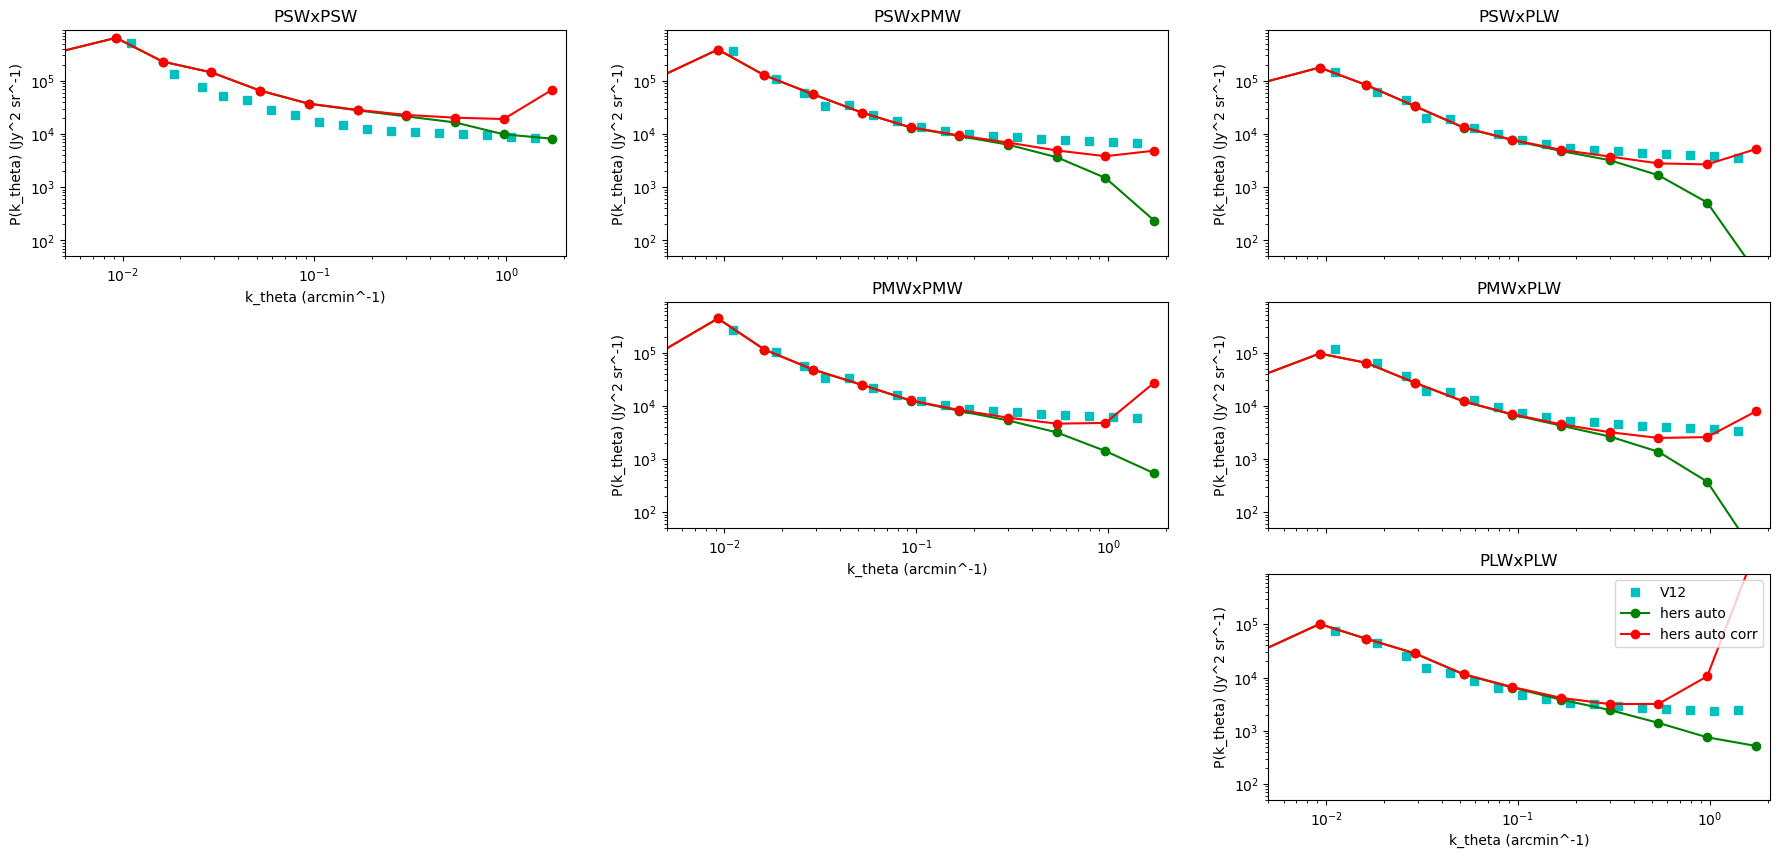

In [29]:
xs=3
ys=3
multfac = 0.15*1e-15
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            #axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            #axs[ii,iii].plot(k_theta, multfac*pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, multfac*np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

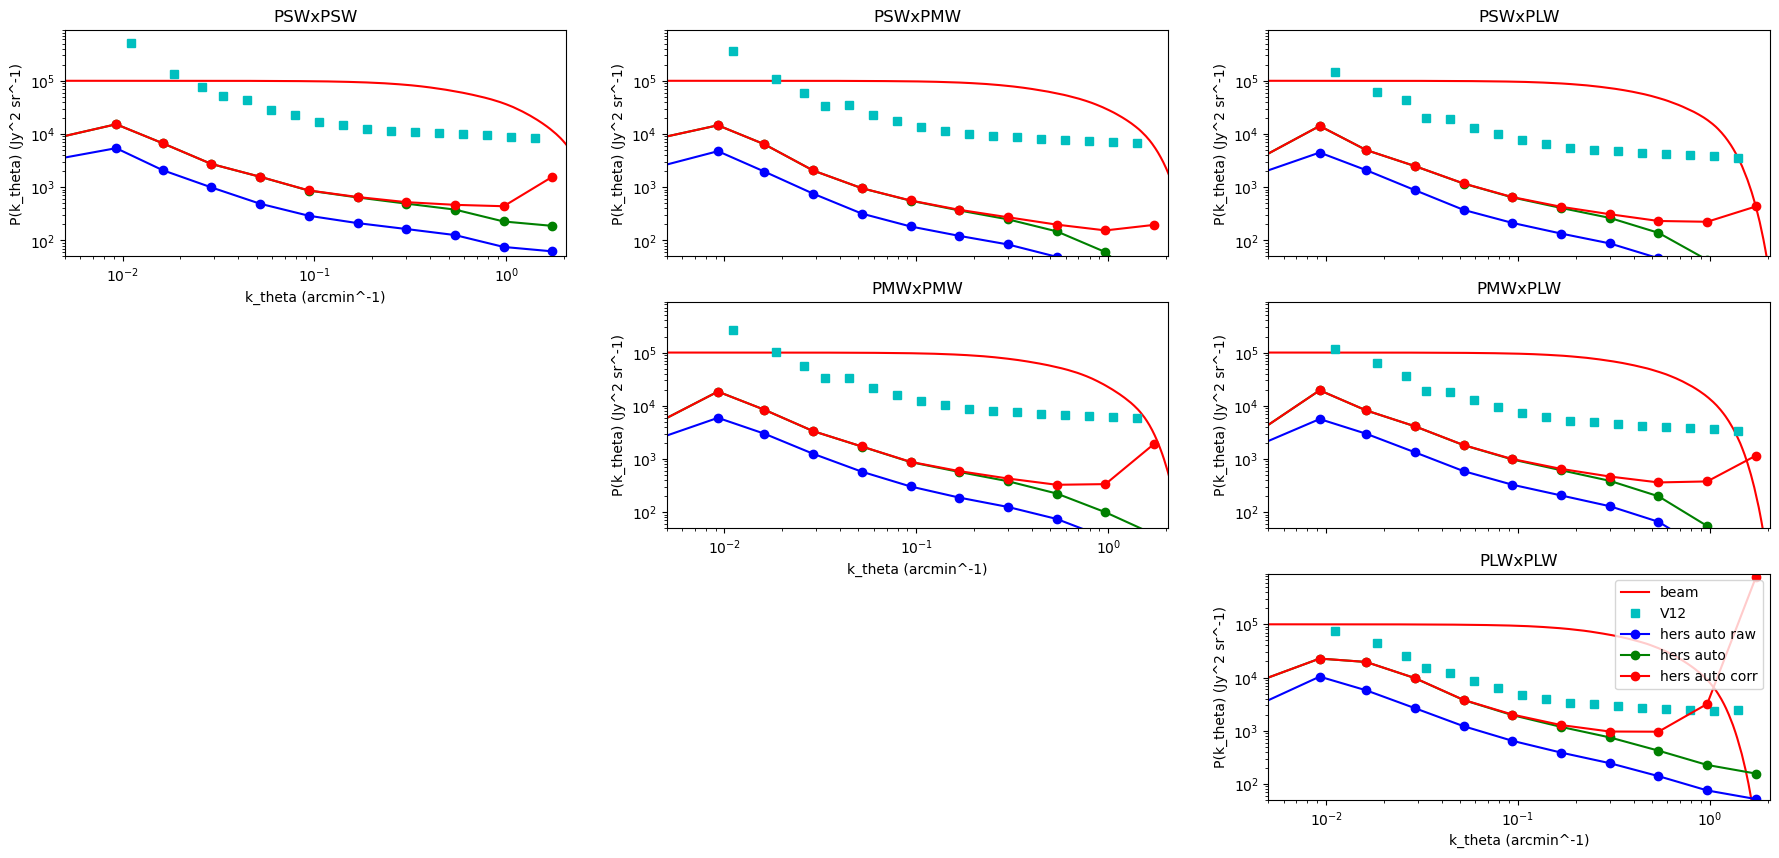

In [11]:
xs=3
ys=3
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

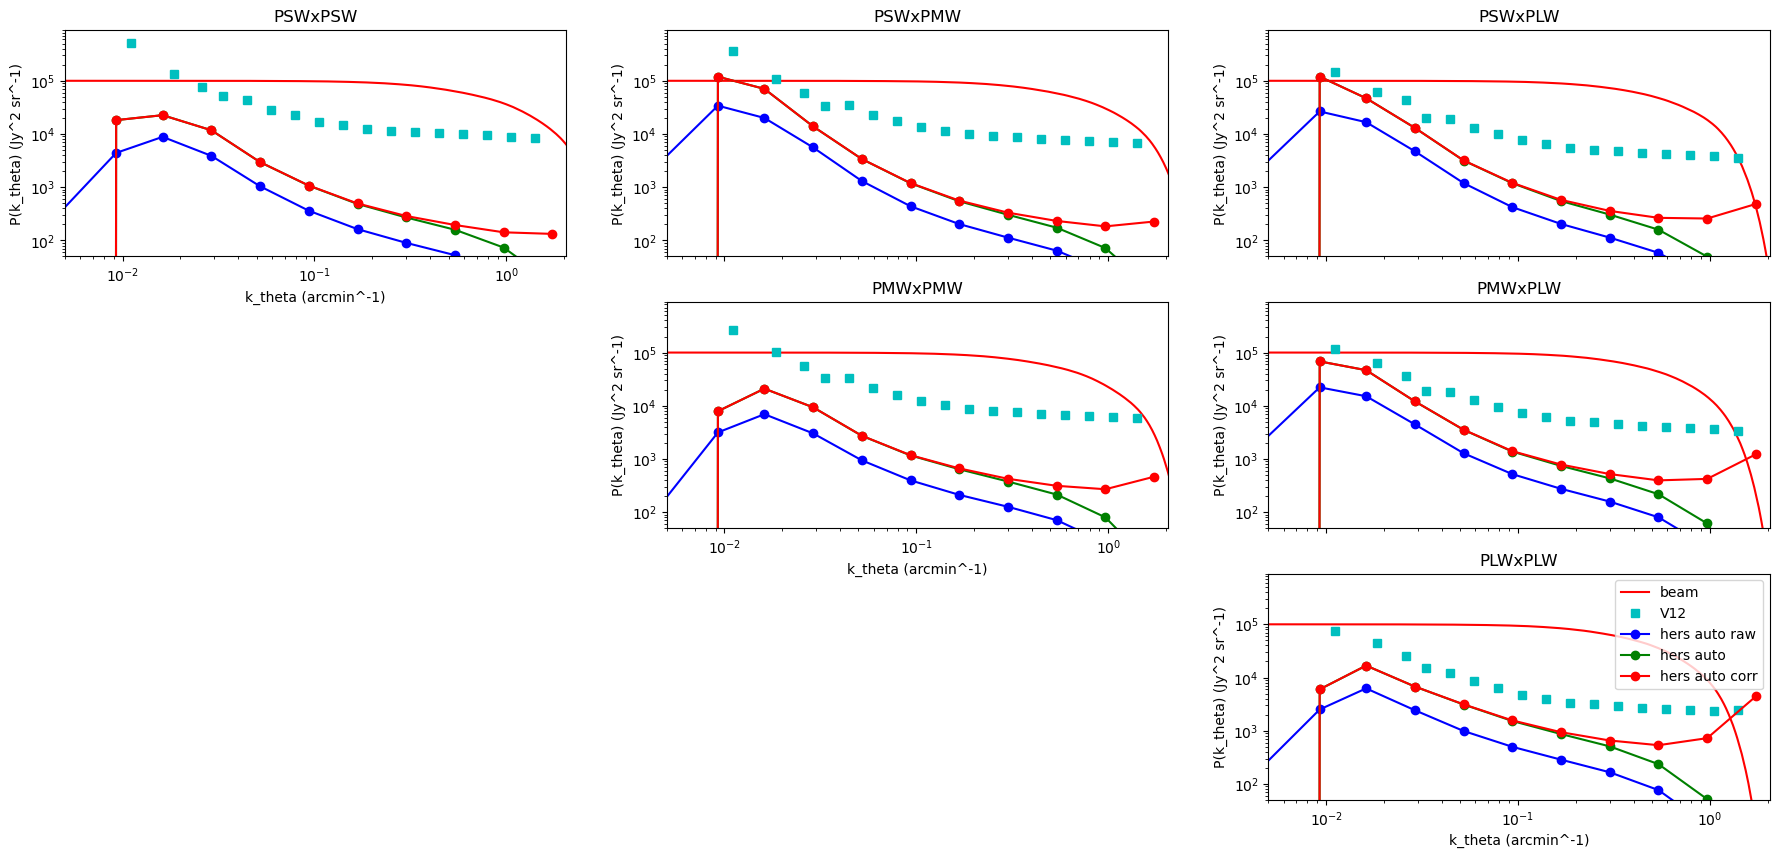

In [11]:
xs=3
ys=3
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

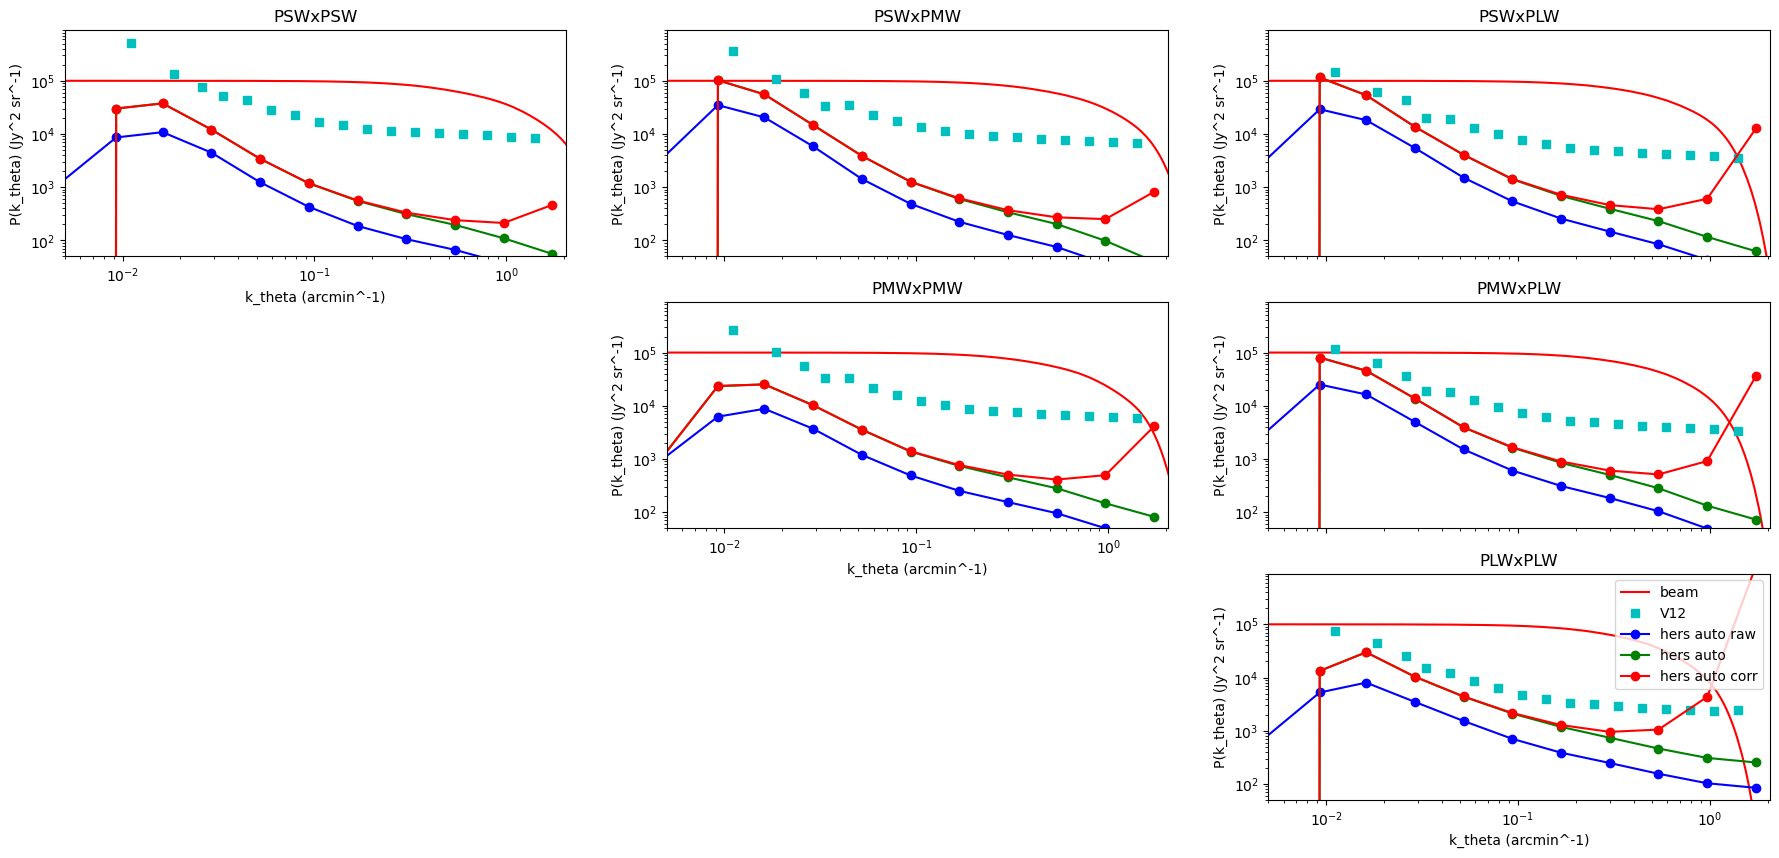

In [23]:
xs=3
ys=3
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

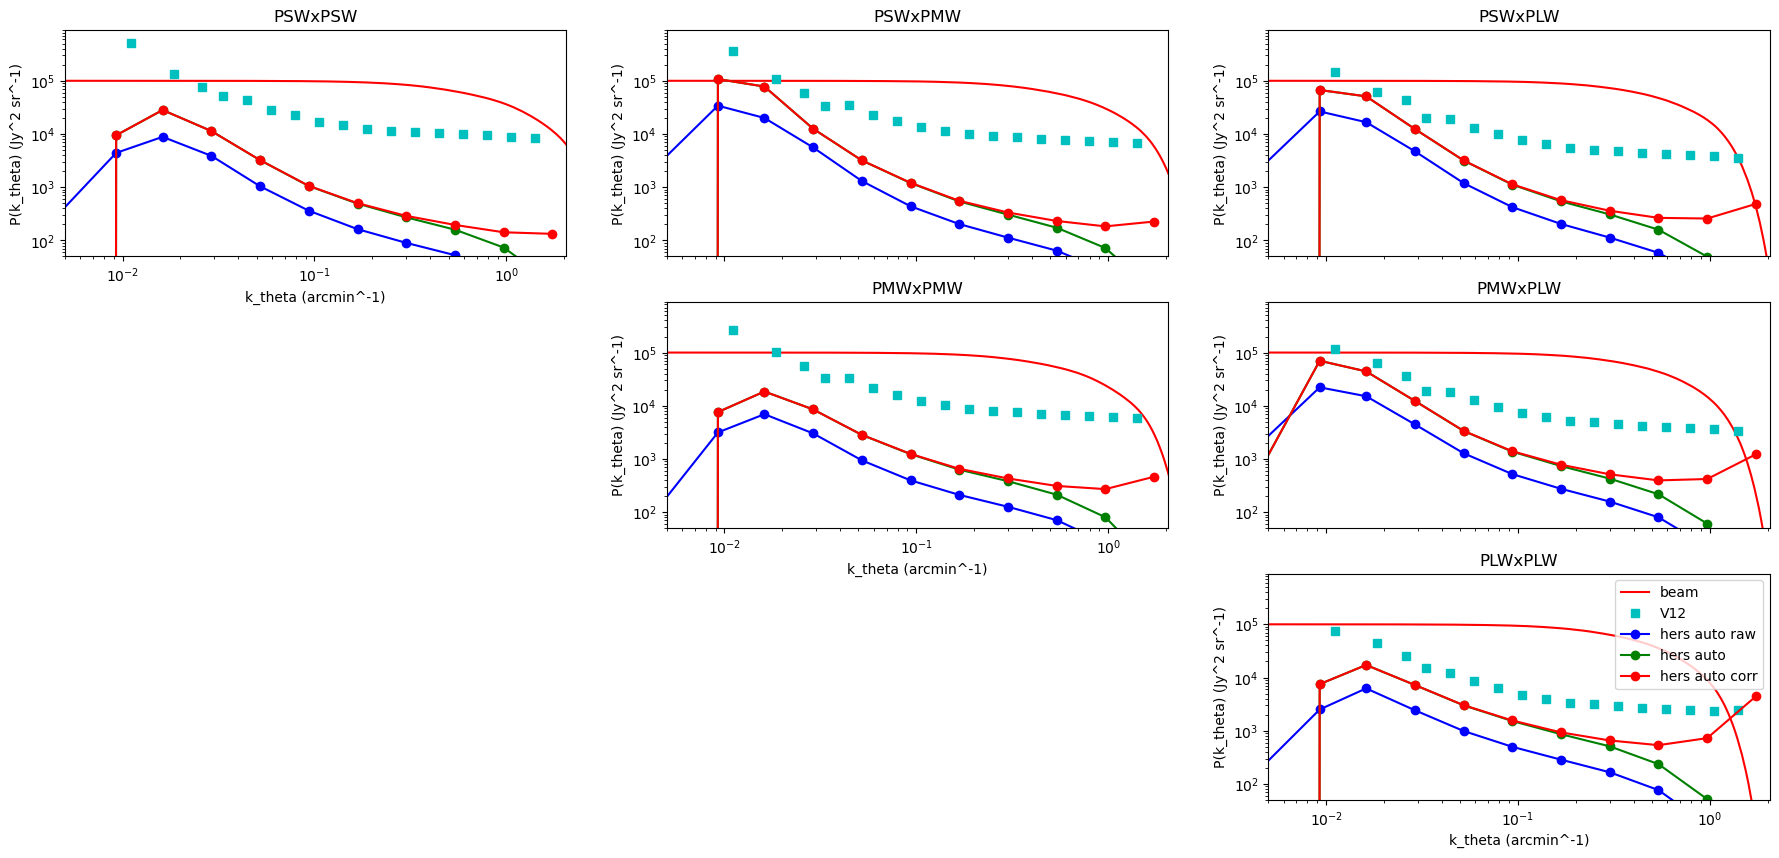

In [19]:
xs=3
ys=3
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            file_psf = os.path.join(path_psf,'psf_'+sav_label+'_2.0_arcsec_pixels_err.sav')
            psf = readsav(file_psf)
            #axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            axs[ii,iii].plot(ell_to_k(psf['ell_psf']), psf['eff_psf']*1e5, '-', c='r', label='beam')

            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

In [39]:
psf.keys()

dict_keys(['ell_psf', 'eff_psf', 'err_psf'])

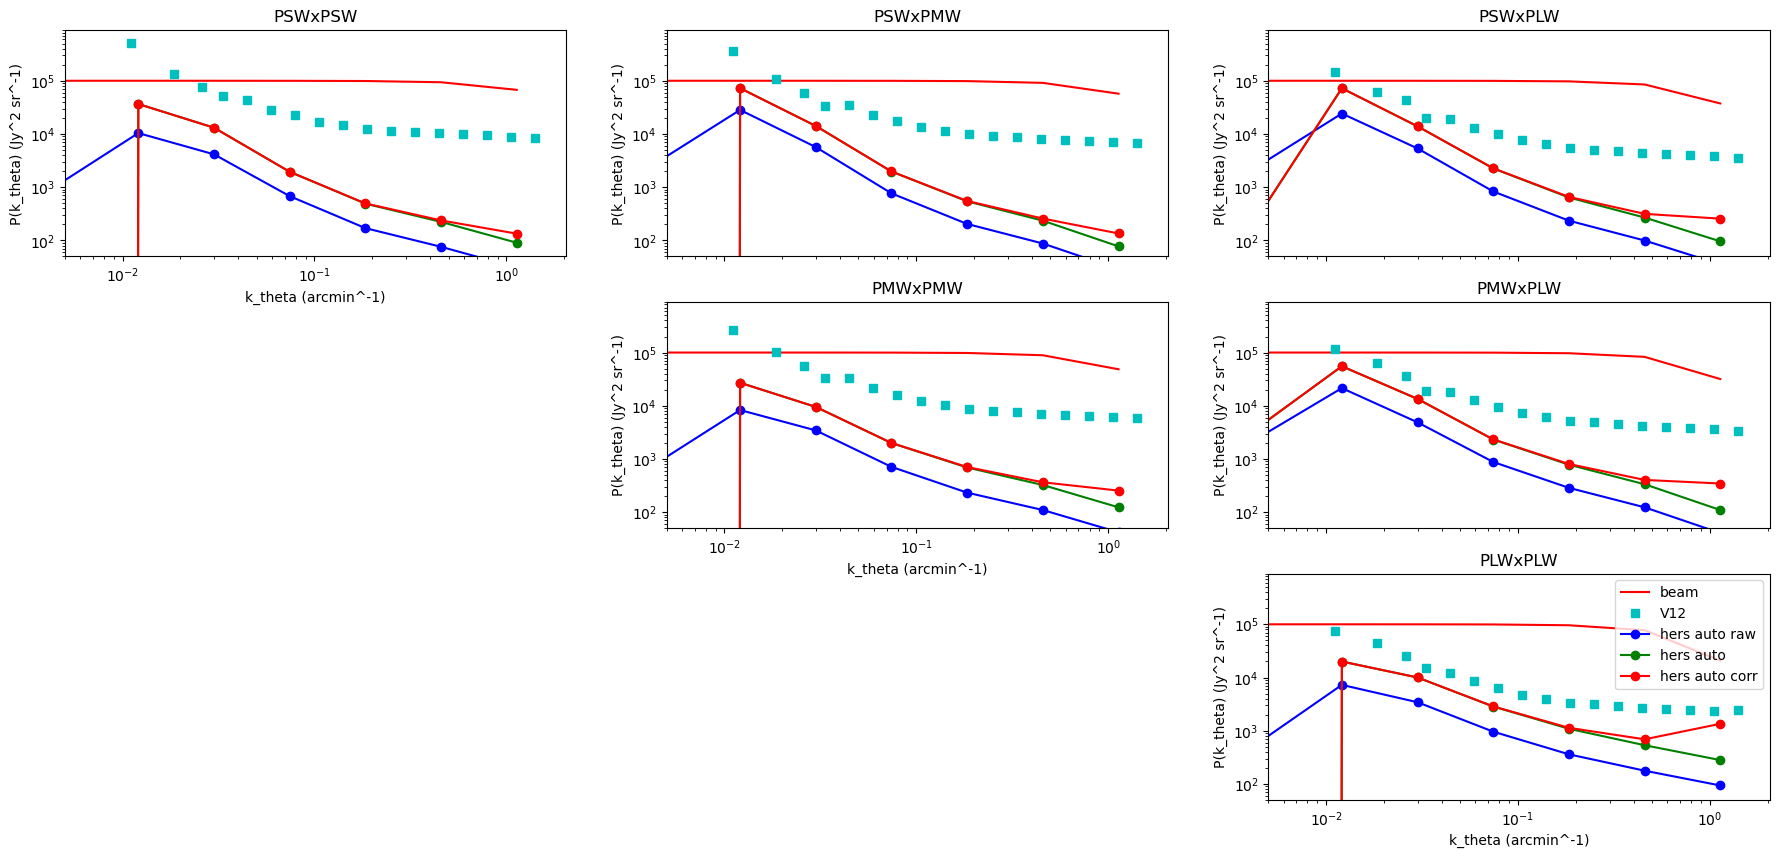

In [40]:
xs=3
ys=3
ell = (ell_bins[1:]+ell_bins[0:-1])/2
k_theta = ell_to_k(ell)
fig, axs = plt.subplots(xs, ys, figsize=(22, 10))
i = 0
for iwv, wv1 in enumerate(wvs): 
    for jwv, wv2 in enumerate(wvs):
        ii = i//xs
        iii = np.mod(i,ys)
        if iwv <= jwv:
            sigma_radian1 = (map_psf[wv1] / 3600 * np.pi / 180) / np.sqrt(8 * np.log10(2))
            sigma_ell1 = 1/sigma_radian1
            Bl1 = np.exp(-0.5 *(ell/sigma_ell1)**2)
            sigma_radian2 = (map_psf[wv2] / 3600 * np.pi / 180) / np.sqrt(8 * np.log10(2))
            sigma_ell2 = 1/sigma_radian2
            Bl2 = np.exp(-0.5 *(ell/sigma_ell2)**2)
            Bl = np.sqrt(Bl1 * Bl2)
            Bl = get_psf_correction(ell, map_psf[wv1], map_psf[wv2])
            axs[ii,iii].plot(k_theta, 1e5*Bl, '-', c='r', label='beam')
            
            xcorr_label = 'x'.join([wv1,wv2])
            sav_label = 'x'.join([map_sav[wv1],map_sav[wv2]])
            path_v12 = os.path.join(path_sav, file_sav+sav_label+'.sav')
            if os.path.isfile(path_v12):
                x = readsav(path_v12)
                y = x['combined_spectra'][:,0,0]
                axs[ii,iii].plot(x['k_t'], y, 's', c='c', label='V12')
            else:
                print('No file found {}'.format(path_v12))
                
            pk_hers = fft_dict[xcorr_label]['pk_hers']
            mkk_hers = fft_dict[xcorr_label]['mkk_hers']
            axs[ii,iii].plot(k_theta, pk_hers, '-o', c='b', label='hers auto raw')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers), '-o', c='g', label='hers auto')
            axs[ii,iii].plot(k_theta, np.matmul(pk_hers, mkk_hers)/Bl, '-o', c='r', label='hers auto corr')
            axs[ii,iii].set_xlim([0.005,2.05])
            axs[ii,iii].set_ylim([5e1,9e5])
            axs[ii,iii].set_xscale('log')
            axs[ii,iii].set_yscale('log')
            axs[ii,iii].set_title(xcorr_label)
            
            axs[ii,iii].set_ylabel('P(k_theta) (Jy^2 sr^-1)')
            if ii != iii:
                axs[ii,iii].set_xticklabels([])
            else:
                axs[ii,iii].set_xlabel('k_theta (arcmin^-1)')
        else:
            axs[ii,iii].axis('off')
        i+=1
            
plt.legend(loc='upper right');            

# Get mask X mask MKK

In [17]:
tst_ell, hers_mask_pk = get_mc_mkk(hers_mask_jk1, hers_mask_jk2, deltal=deltal, width=width)

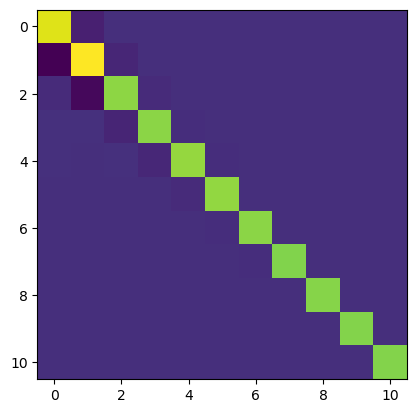

In [21]:
hers_mkk=np.linalg.inv(hers_mask_pk)
plt.imshow(hers_mkk);

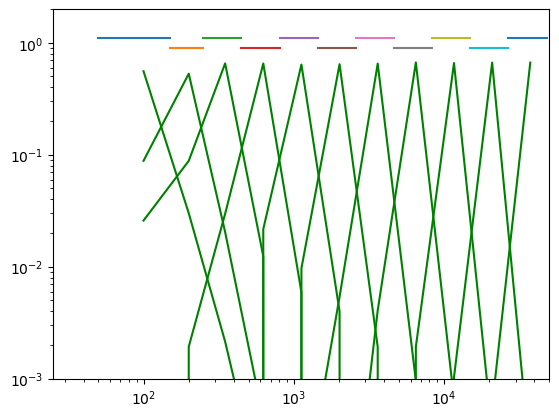

In [23]:
fudge_factor=2.0
ell_out = (tst_ell[:-1]+tst_ell[1:])/2
for i in range(len(ell_out)):
    plt.plot(ell_out, fudge_factor*hers_mask_pk[i],'g');
    yh = 1+0.1*(-1)**i
    plt.plot([tst_ell[i],tst_ell[i+1]],[yh,yh])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([25,50000])    
    plt.ylim([1e-3,2])

# Test recovery of input power spetrum

In [14]:
tst_ell, tst_pk_nomask = get_mc_mkk(hers_mask_jk1, hers_mask_jk2, deltal=deltal, width=width, nomask=True)

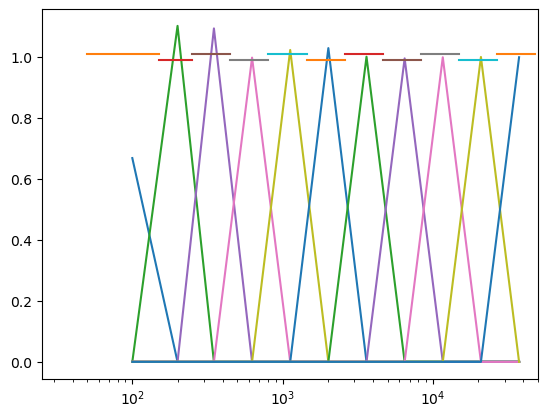

In [16]:
fudge_factor = 2.0
ell_out = (tst_ell[:-1]+tst_ell[1:])/2
for i in range(len(ell_out)):
    plt.plot(ell_out, fudge_factor*tst_pk_nomask[i]);
    yh = 1+0.01*(-1)**i
    plt.plot([tst_ell[i],tst_ell[i+1]],[yh,yh])
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim([25,50000])    
    plt.ylim([1e-8,1.1])

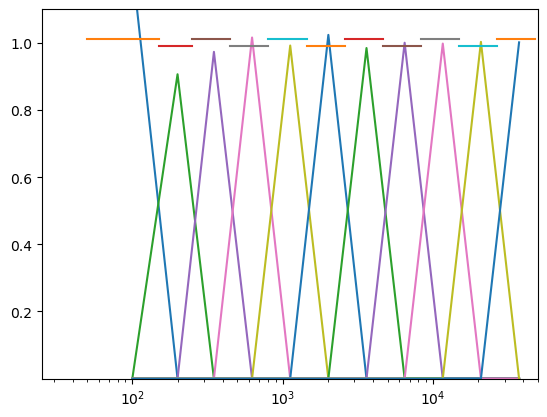

In [13]:
fudge_factor = 2.0
ell_out = (tst_ell[:-1]+tst_ell[1:])/2
for i in range(len(ell_out)):
    plt.plot(ell_out, fudge_factor*tst_pk_nomask[i]);
    yh = 1+0.01*(-1)**i
    plt.plot([tst_ell[i],tst_ell[i+1]],[yh,yh])
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim([25,50000])    
    plt.ylim([1e-8,1.1])